# Exploratoy Data Analysis (EDA)

Exploratory Data Analysis to diagnose mexican economy.

The main goal of this particular project is to analyze some economic parameters of interest to understand the statistical behavior (over time) of the study parameters and their influence or relationship during the economy crisis that have occurred in Mexico since 1990 until today, through Data Science techniques.

> Elias Castellanos Alamilla

> April-2023

## Load dependencies

In [2]:
# Data manipulation
import pandas as pd
from datetime import datetime

# Math's/basic statistic's
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px

# OS
import os
import random

In [3]:
# Local functions
# Data manipulation
from data_gathering import *

# Data visualization
from data_viz import *

# set config
from app.config import *

Project path files OK!


## Problem definition

We want to study the behavior of certain Mexican economic indicators (annual INPC, CETES, dls/mxn, UDI's) to understand from a statistical perspective, the "recent" economic history of Mexico in order to be able to establish personal financial strategies. i.e. Is it convenient to take a bank loan with a variable interest rate in inflationary times?

Questions to answer:

Is there any relationship between the indicators established with the economic record of the country?
If so, how strong is that relationship?
Which variable has the higher impact on historical behavior?
How can we discretize economic history into categories or data sets?

## Hypothesis

Based on the global uncertainty about inflation and bank stability...exists the probability that inflation values in Mexico rise again, hence, we need to keep cautious in personal expenses for the next 12 months.

## Load Data

In [4]:
indicadores_mx = read_sql_data(db_connection, 'indicadores_mx')
produccion_acumulada = read_sql_data(db_connection, 'produccion_acumulada')

In [5]:
produccion_acumulada.set_index("Fecha", inplace=True)
produccion_acumulada.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1536 entries, 1930-06-01 to 2023-07-01
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Hcs_liq_Mbd            1536 non-null   float64
 1   Aceite_Mbd             1536 non-null   float64
 2   Condensado_Mbd         1536 non-null   float64
 3   Gas_asociado_MMpcd     1536 non-null   float64
 4   Gas_no_asociado_MMpcd  1536 non-null   float64
 5   Agua_Mbd               1536 non-null   float64
dtypes: float64(6)
memory usage: 84.0 KB


In [6]:
indicadores_mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     558 non-null    datetime64[ns]
 1   dls_mxn                   558 non-null    float64       
 2   UDI                       495 non-null    float64       
 3   MME                       486 non-null    float64       
 4   CETES                     557 non-null    float64       
 5   inflacion_anual           556 non-null    float64       
 6   inflacion_subyacente      556 non-null    float64       
 7   interes_interbancario_28  496 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 35.0 KB


In [7]:
indicadores_mx.drop_duplicates(subset="fecha", keep="first", inplace=True)
indicadores_mx.reset_index(drop=True, inplace=True)
indicadores_mx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   fecha                     424 non-null    datetime64[ns]
 1   dls_mxn                   424 non-null    float64       
 2   UDI                       361 non-null    float64       
 3   MME                       352 non-null    float64       
 4   CETES                     423 non-null    float64       
 5   inflacion_anual           422 non-null    float64       
 6   inflacion_subyacente      422 non-null    float64       
 7   interes_interbancario_28  362 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 26.6 KB


In [8]:
indicadores_mx.set_index('fecha', inplace=True)

In [9]:
pd.infer_freq(indicadores_mx.index)

'MS'

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [11]:
plt.style.use('fivethirtyeight')

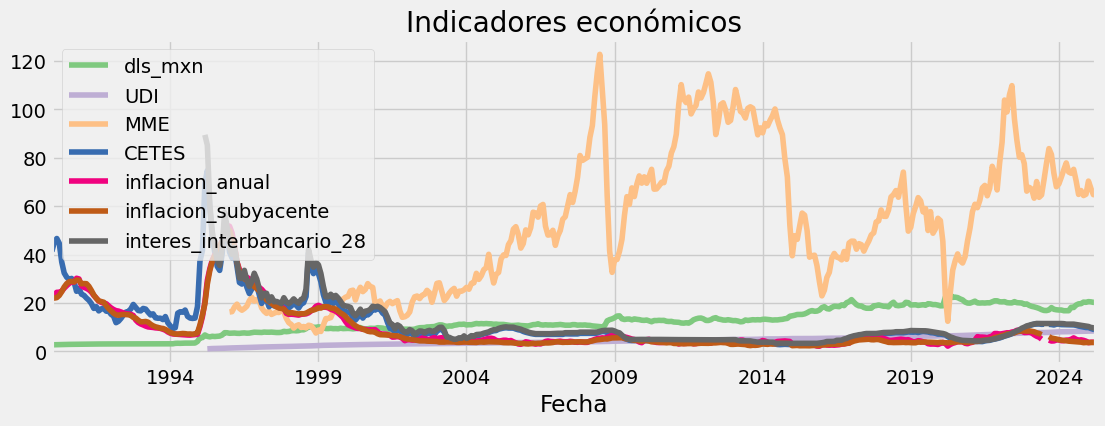

In [12]:
indicadores_mx.plot(colormap='Accent', figsize=(12, 4), xlabel="Fecha", title="Indicadores económicos")

plt.savefig(f"./app/viz/portada_{today_str}.png", dpi=1000)
plt.show()

In [13]:
indicadores_mx.head()

dls_mxn  UDI  MME  CETES  inflacion_anual  inflacion_subyacente  \
fecha                                                                          
1990-01-01  2.701659  NaN  NaN  41.29            22.48                 22.23   
1990-02-01  2.731658  NaN  NaN  45.20            23.57                 22.02   
1990-03-01  2.760357  NaN  NaN  46.65            24.40                 22.21   
1990-04-01  2.791184  NaN  NaN  44.64            24.43                 23.11   
1990-05-01  2.821791  NaN  NaN  36.92            24.89                 24.66   

            interes_interbancario_28  
fecha                                 
1990-01-01                       NaN  
1990-02-01                       NaN  
1990-03-01                       NaN  
1990-04-01                       NaN  
1990-05-01                       NaN

In [14]:
indicadores_mx.tail()

dls_mxn       UDI        MME  CETES  inflacion_anual  \
fecha                                                                
2024-12-01  20.266055  8.331915  64.934091   9.85             4.21   
2025-01-01  20.549018  8.362028  70.373913   9.86             3.59   
2025-02-01  20.457137  8.385948  67.334500   9.45             3.77   
2025-03-01  20.241745  8.410383  64.768000   9.10             3.77   
2025-04-01  20.358700  8.422654  64.768000   9.10             3.77   

            inflacion_subyacente  interes_interbancario_28  
fecha                                                       
2024-12-01                  3.65                 10.380720  
2025-01-01                  3.66                 10.282523  
2025-02-01                  3.65                  9.878884  
2025-03-01                  3.65                  9.739170  
2025-04-01                  3.65                  9.270400

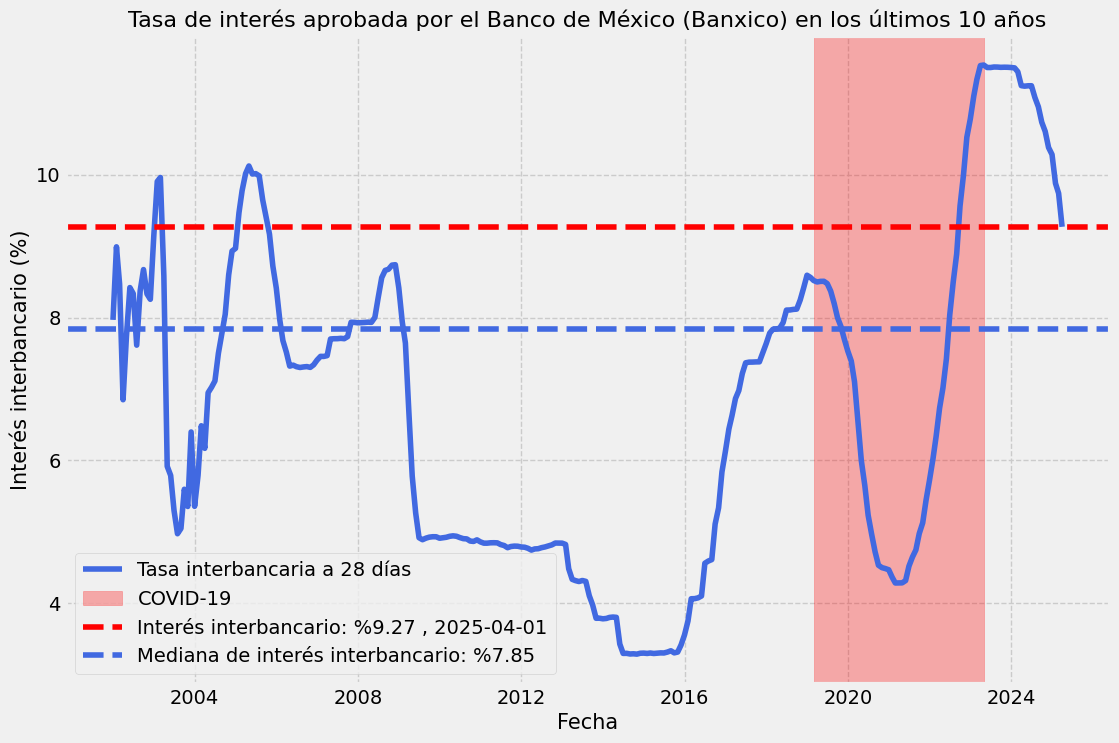

In [16]:
tasa_interbancaria = indicadores_mx['interes_interbancario_28']
last_date = tasa_interbancaria.index[-1].date()

fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(x=tasa_interbancaria['2002':].index, y=tasa_interbancaria['2002':], label='Tasa interbancaria a 28 días', color='royalblue')

ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Interés interbancario (%)', fontsize=15)
ax.set_title('Tasa de interés aprobada por el Banco de México (Banxico) en los últimos 10 años', fontsize=16)

ax.axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.3, label='COVID-19')
ax.axhline(tasa_interbancaria.iloc[-1], label='Interés interbancario: %{} , {}'.format(round(tasa_interbancaria.iloc[-1], 2),last_date), linestyle='--', color='red')
ax.axhline(tasa_interbancaria.median(), label='Mediana de interés interbancario: %{}'.format(round(tasa_interbancaria.median(), 2)), linestyle='--', color='royalblue')

ax.grid(True, linestyle='--')
ax.legend(loc='lower left')
plt.savefig(f"./app/viz/historico_tasa_interbancaria_banxico_{today_str}.svg")

plt.show()

count    362.00
mean      11.30
std       11.02
min        3.29
25%        4.92
50%        7.85
75%       11.25
max       89.48
Name: interes_interbancario_28, dtype: float64


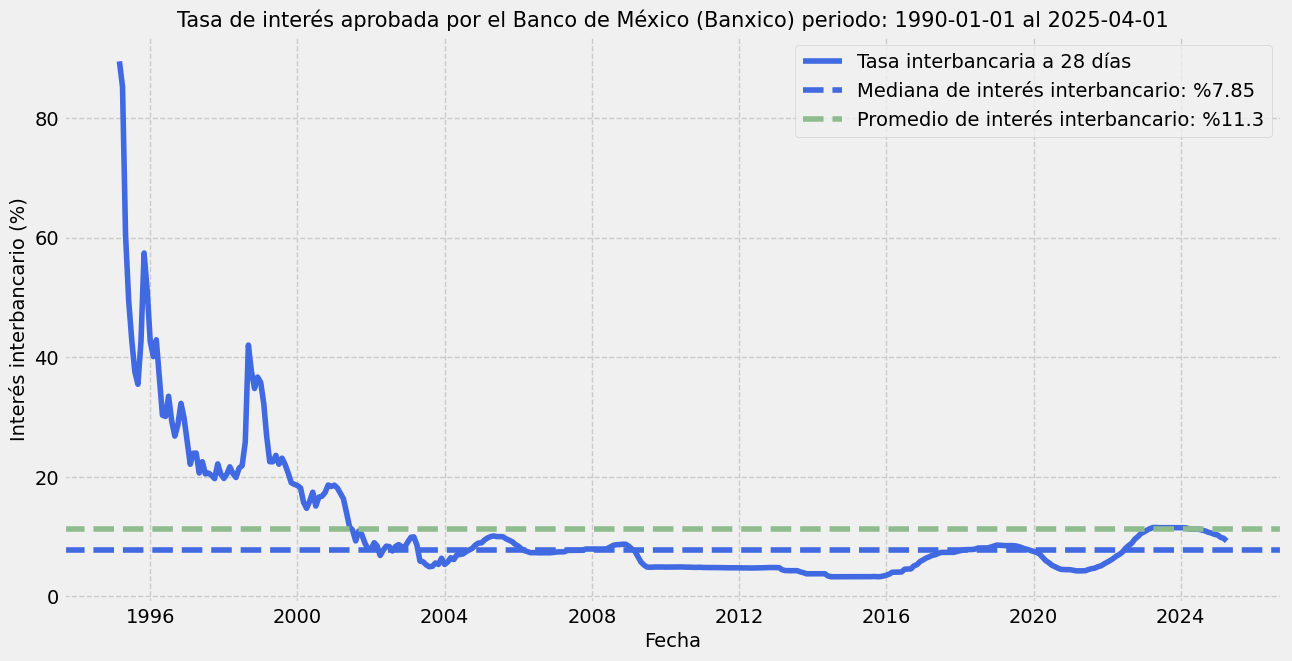

In [18]:
print(tasa_interbancaria.describe().round(2))
first_date = tasa_interbancaria.index[0].date()

fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x=tasa_interbancaria.index, y=tasa_interbancaria, label='Tasa interbancaria a 28 días', color='royalblue')

ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Interés interbancario (%)', fontsize=14)
ax.set_title(f"Tasa de interés aprobada por el Banco de México (Banxico) periodo: {first_date} al {last_date}", fontsize=15)

ax.axhline(tasa_interbancaria.median(), label='Mediana de interés interbancario: %{}'.format(round(tasa_interbancaria.median(), 2)), linestyle='--', color='royalblue')
ax.axhline(tasa_interbancaria.mean(), label='Promedio de interés interbancario: %{}'.format(round(tasa_interbancaria.mean(), 2)), linestyle='--', color='darkseagreen')

ax.grid(True, linestyle='--')
ax.legend(loc='upper right')
plt.savefig(f"./app/viz/mean_median_iit_banxico_{today_str}.svg")

plt.show()

## Distributions

* Continuous data features.

Probability Distributions: 
Provide us the idea by visually looking the values we have in a particular column. For example if we have normally distributed graph but we found some dips at some values then we would check for the missing values which are forming those dips and similarly if we have quite distorted graph then we can use lognormal to normalize the values and get a bell shaped curve.

> Distribuciones discretas: 

1. _Bernoulli Distribution_
2. _Uniform Distribution_
3. _Binomial Distribution_
4. _Geometric Distribution_
5. _Poisson Distribution_
6. _Hyper-Geometric Distribution_
7. _Negative Binomial Distribution_

> Distribuciones continuas:

1. _Uniform Distribution_
2. _Normal Distribution_
3. _Exponential Distribution_
4. _Chi-squared Distribution_
5. _Gamma distribution_
6. _Student T-Distribution_
7. _F-Distribution_
8. _Log-Normal Distribution_

[Probability Distribution](https://towardsai.net/p/l/different-probability-distributions-part-2?utm_campaign=rop-content-recycle&utm_content=213814543&utm_medium=social&utm_source=linkedin&hss_channel=lcp-3740012)

[7 types of statistical distribution](https://datasciencedojo.com/blog/types-of-statistical-distributions-in-ml/)

[Pandas Density Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.density.html)

In [19]:
# Statistical summary
indicadores_mx.describe().transpose().round(2)

count   mean    std   min    25%    50%    75%  \
dls_mxn                   424.0  12.03   5.47  2.70   9.12  11.16  17.09   
UDI                       361.0   4.53   1.84  1.03   3.18   4.42   5.83   
MME                       352.0  52.55  28.97  7.58  25.16  50.12  72.01   
CETES                     423.0  11.86  10.49  2.67   4.83   7.73  15.80   
inflacion_anual           422.0   9.23   9.14  2.13   3.98   5.03   9.72   
inflacion_subyacente      422.0   8.93   9.13  2.30   3.64   4.46  10.47   
interes_interbancario_28  362.0  11.30  11.02  3.29   4.92   7.85  11.25   

                             max  
dls_mxn                    24.27  
UDI                         8.42  
MME                       122.78  
CETES                      74.75  
inflacion_anual            51.97  
inflacion_subyacente       50.60  
interes_interbancario_28   89.48

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\3909827192.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  indicadores_mx.plot(


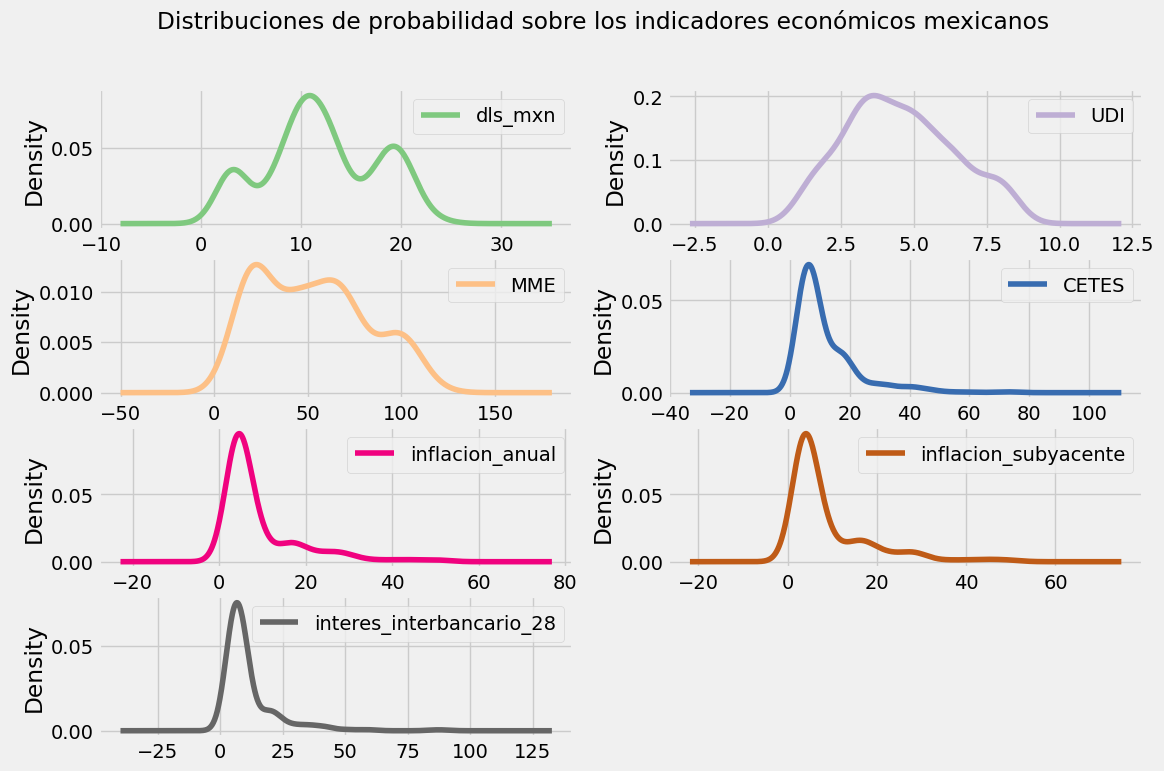

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

title="Distribuciones de probabilidad sobre los indicadores económicos mexicanos"
indicadores_mx.plot(
    kind='density',
    subplots=True,
    layout=(4, 2),
    sharex=False,
    grid=True,
    ax=ax,
    title=title,
    colormap='Accent'
)
plt.savefig(f"./app/viz/probability_distributions_{today_str}.svg")
plt.show()

## Feature description

* Mexican Peso: Relationship of the amount of pesos needed to acquire 1 US dollar. The higher the amount of pesos required, the weaker the national currency is with respect to the US dollar.

* National Consumer Price Index: Based on the second half of July 2018 (monthly), Inflation, Consumer Price Index (INPC), Annual Inflation.

* CETES: Bearer debt securities issued by the Federal Government since 1978, which obligates the government to pay their nominal value at maturity. This instrument was created to influence the regulation of the monetary mass, finance productive investment, and promote healthy development of the stock market. Through this mechanism, resources are collected from individuals and companies who are guaranteed a fixed income. The investor's return is the difference between the purchase and sale price. This instrument is placed through brokerage houses at a discount rate and has the backing of the Bank of Mexico, as the federal government's financial agent. [CETES](https://es.wikipedia.org/wiki/Certificados_de_la_Tesorer%C3%ADa_de_la_Federaci%C3%B3n)

* Investment Units (UDI): Investment Units (UDI) are value units established by the Bank of Mexico to meet the obligations of mortgage loans or any commercial or financial transaction. They began to be used in Mexico after the economic crisis of 1994-1995 by Sofoles, in order to provide the possibility of obtaining mortgage loans for individuals who were not eligible for credit in the country's financial institutions. Its value increases daily to maintain the purchasing power of money and is published in the Official Gazette of the Federation. The value of UDI is established taking into account the variations of the National Consumer Price Index (CPI), that is, taking into account inflation. This leads to fixed interest rates and stabilizes debts. [UDI's](https://es.wikipedia.org/wiki/Unidades_de_Inversi%C3%B3n)

* Interbank Interest Rate: The Equilibrium Interbank Interest Rate (TIIE) is a representative rate of credit operations between banks calculated by the Bank of Mexico. This rate is used as a reference to establish some commercial rates at the bank level. It can also be interpreted as a benchmark rate to assess the risk of acquiring a bank loan at a particular time. [TIIE](https://es.wikipedia.org/wiki/Tasa_de_inter%C3%A9s_interbancaria_de_equilibrio)

* Gross Domestic Product (GDP): GDP is the monetary value of final goods and services produced by an economy in a given period. GDP is a representative indicator that helps measure the growth or decline of the production of goods and services of each country's companies, solely within its territory. This indicator reflects the competitiveness of companies.
[PIB INEGI](https://www.inegi.org.mx/app/glosario/default.html?p=IPL2017)

## EDA 

[List of named colors in Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html)

In [21]:
indicadores_mx.columns

Index(['dls_mxn', 'UDI', 'MME', 'CETES', 'inflacion_anual',
       'inflacion_subyacente', 'interes_interbancario_28'],
      dtype='object')

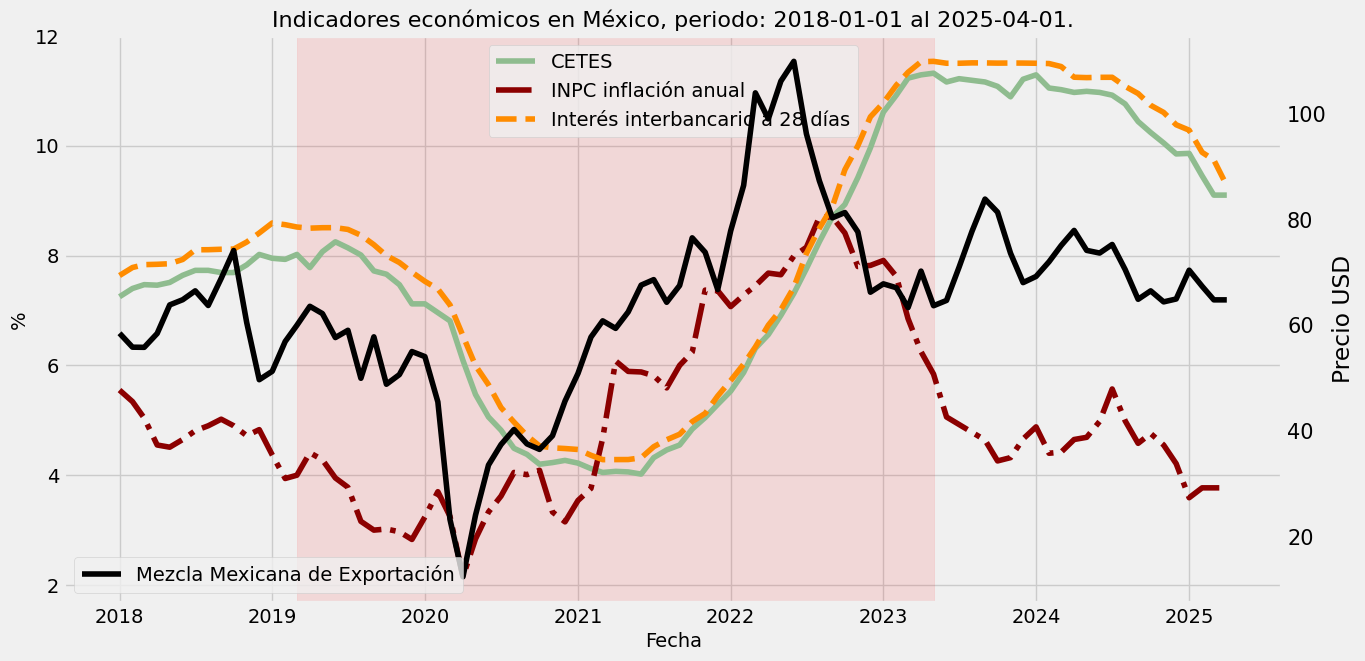

In [22]:
ultima_fecha = indicadores_mx.index[-1].date()
fecha_inicial = indicadores_mx['2018':].index[0].date()

fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=indicadores_mx['2018':], x=indicadores_mx['2018':].index, y='CETES', label='CETES', color='darkseagreen')
sns.lineplot(data=indicadores_mx['2018':], x=indicadores_mx['2018':].index, y='inflacion_anual', label='INPC inflación anual', color='darkred', linestyle='dashdot')
sns.lineplot(data=indicadores_mx['2018':], x=indicadores_mx['2018':].index, y='interes_interbancario_28', label='Interés interbancario a 28 días', linestyle='--', color='darkorange')

ax2 = ax.twinx()
ax2.set_ylabel("Precio USD")
sns.lineplot(data=indicadores_mx['2018':], x=indicadores_mx['2018':].index, y='MME', label='Mezcla Mexicana de Exportación', color='black', ax=ax2)

plt.title('Indicadores económicos en México, periodo: {} al {}.'.format(fecha_inicial,ultima_fecha), fontsize=16)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('%', fontsize=14)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.1, label='COVID-19')

plt.grid(True, linestyle='dashdot')

ax2.legend(loc='lower left')

plt.grid(visible=False)
plt.savefig(f"./app/viz/indicadores_mx_2018-{today_str}.svg")
plt.show()

In [23]:
indicadores_mx['2018':].corr().style.applymap(highlight_cells)

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\2521749187.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  indicadores_mx['2018':].corr().style.applymap(highlight_cells)


In [24]:
indicadores_mx['2018':].corr("spearman").style.applymap(highlight_cells)

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\532970131.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  indicadores_mx['2018':].corr("spearman").style.applymap(highlight_cells)


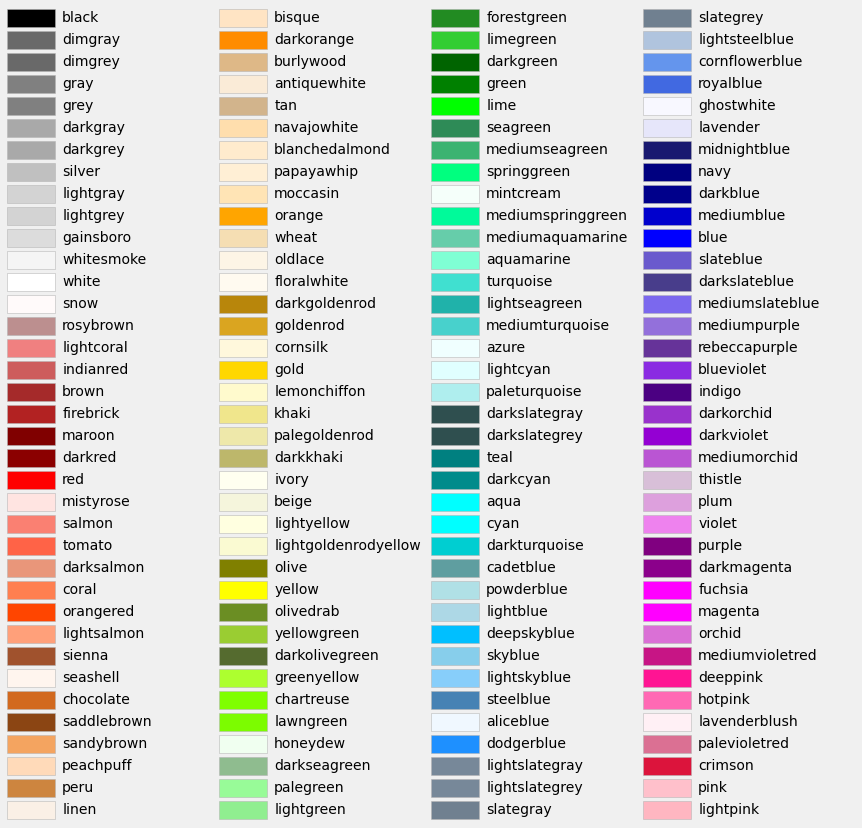

In [25]:
import matplotlib.colors as mcolors

plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [32]:
indicadores_mx['2000':]

dls_mxn       UDI        MME  CETES  inflacion_anual  \
fecha                                                                
2000-01-01   9.487776  2.687114  22.661905  16.19            11.02   
2000-02-01   9.425157  2.721520  25.002381  15.81            10.52   
2000-03-01   9.287577  2.747239  25.285217  13.66            10.11   
2000-04-01   9.390328  2.762921  21.226000  12.93             9.73   
2000-05-01   9.515810  2.778516  24.406957  14.18             9.48   
...               ...       ...        ...    ...              ...   
2024-12-01  20.266055  8.331915  64.934091   9.85             4.21   
2025-01-01  20.549018  8.362028  70.373913   9.86             3.59   
2025-02-01  20.457137  8.385948  67.334500   9.45             3.77   
2025-03-01  20.241745  8.410383  64.768000   9.10             3.77   
2025-04-01  20.358700  8.422654  64.768000   9.10             3.77   

            inflacion_subyacente  interes_interbancario_28  
fecha                                                       
2000-01-01                 13.17                 18.551190  
2000-02-01                 12.36                 18.151905  
2000-03-01                 11.33                 15.769091  
2000-04-01                 10.59                 14.736944  
2000-05-01                 10.01                 15.917143  
...                          ...                       ...  
2024-12-01                  3.65                 10.380720  
2025-01-01                  3.66                 10.282523  
2025-02-01                  3.65                  9.878884  
2025-03-01                  3.65                  9.739170  
2025-04-01                  3.65                  9.270400  

[304 rows x 7 columns]

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\1305952663.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = indicadores_mx.inflacion_anual[-1]


                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

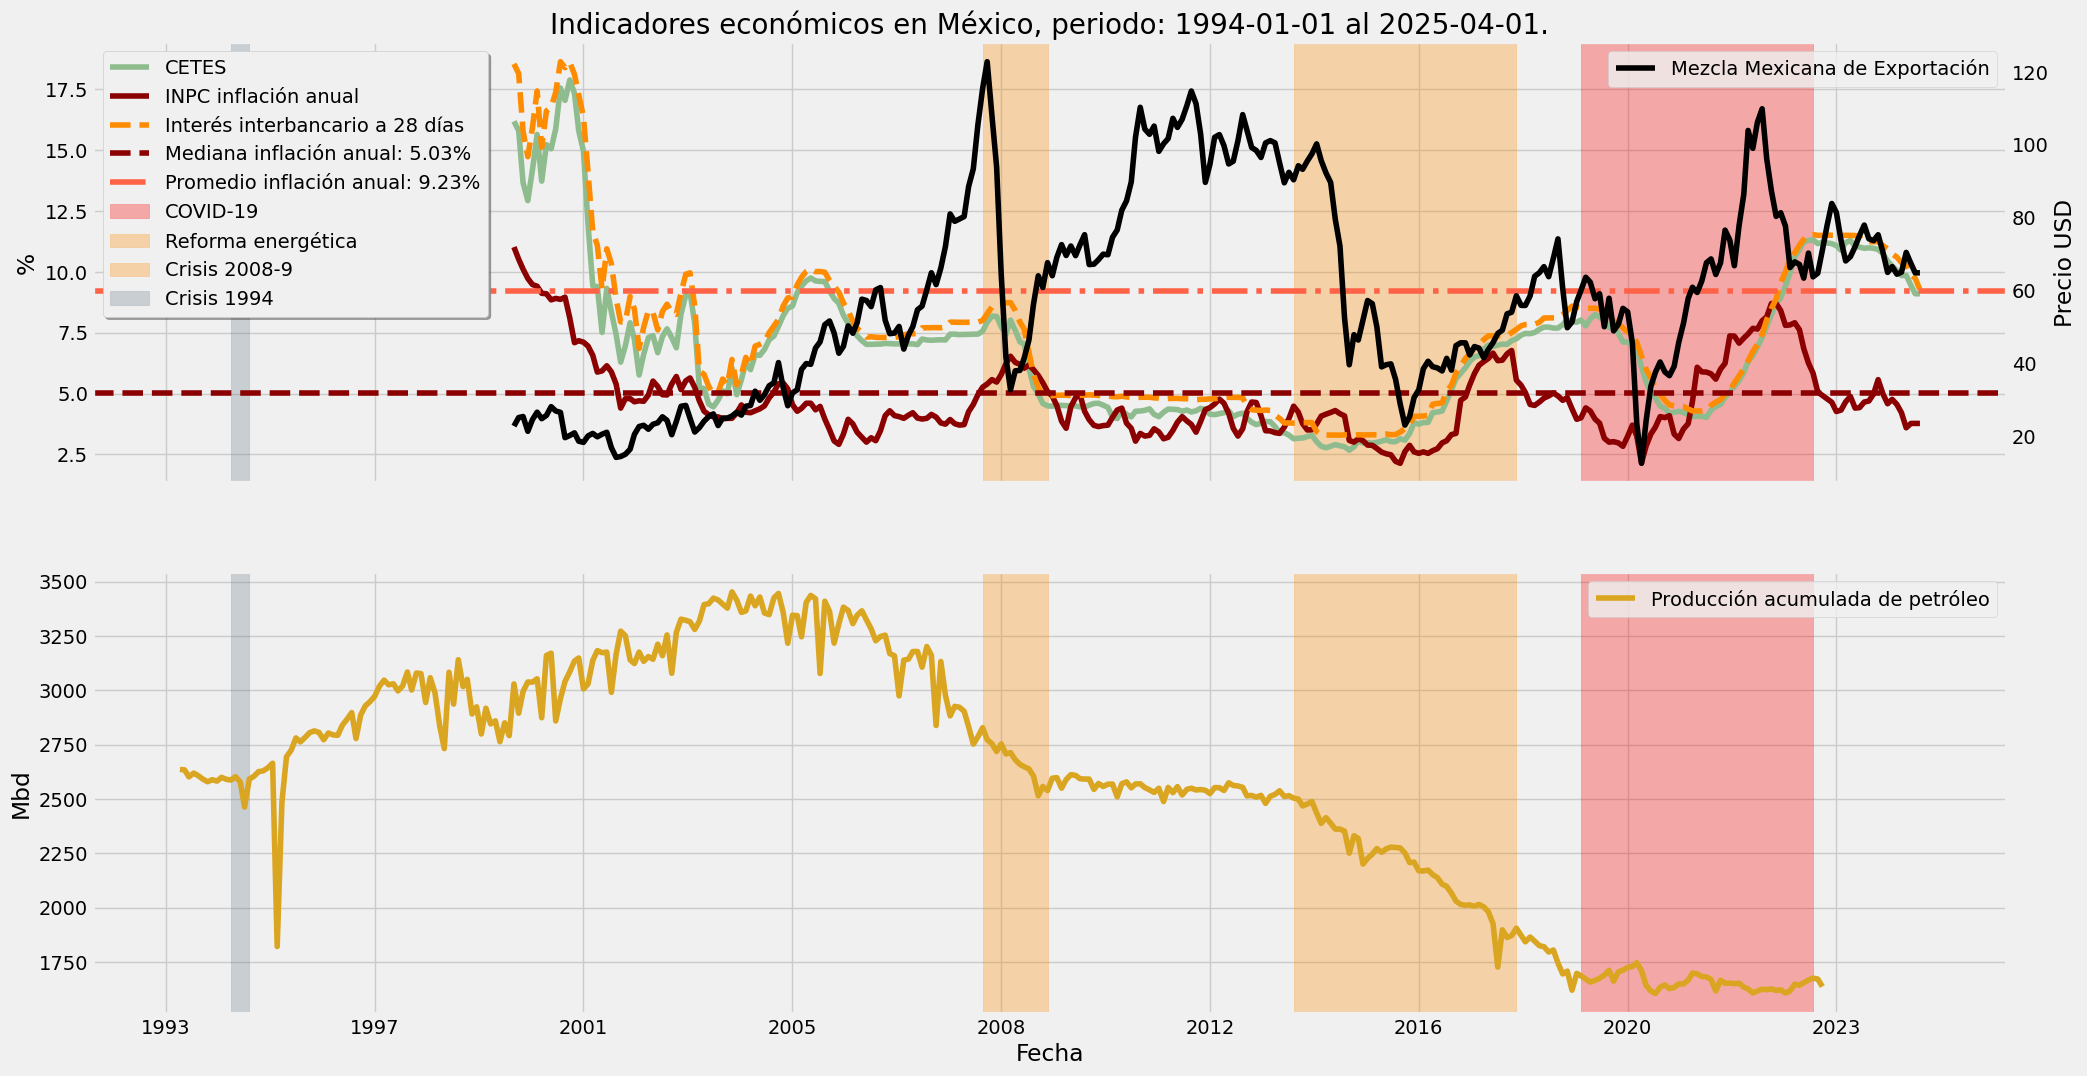

In [33]:
# supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

ultima_fecha = indicadores_mx.index[-1].date()
fecha_inicial = indicadores_mx.loc['2000'].index[0].date()
median = round(indicadores_mx['inflacion_anual'].median(), 2)
mean = round(indicadores_mx['inflacion_anual'].mean(), 2)
last_value = indicadores_mx.inflacion_anual.iloc[-1]

print(indicadores_mx.corr().round(2))
print("-"*40)
print(indicadores_mx.describe().round(2))
fig, ax = plt.subplots(2, 1, figsize=(22, 12), sharex=True)

sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='CETES', label='CETES', color='darkseagreen', ax=ax[0])
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='inflacion_anual', label='INPC inflación anual', color='darkred', ax=ax[0])
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='interes_interbancario_28', label='Interés interbancario a 28 días', linestyle='--', color='darkorange', ax=ax[0])

ax2 = ax[0].twinx()
ax2.set_ylabel("Precio USD")
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='MME', label='Mezcla Mexicana de Exportación', color='black', ax=ax2)

ax[0].set_title(f'Indicadores económicos en México, periodo: 1994-01-01 al {ultima_fecha}.', fontsize=20)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('%')
ax[0].set_xticks(indicadores_mx.index[::45])

ax[0].axhline(indicadores_mx['inflacion_anual'].median(), label=f"Mediana inflación anual: {median}%", linestyle='--', color='darkred')
ax[0].axhline(indicadores_mx['inflacion_anual'].mean(), label=f"Promedio inflación anual: {mean}%", linestyle='dashdot', color='tomato')
ax[0].axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.3, label='COVID-19')
ax[0].axvspan('2014-01-01', '2018-01-01', color='darkorange', alpha=0.3, label='Reforma energética')
ax[0].axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.3, label='Crisis 2008-9')
ax[0].axvspan('1994-12-01', '1995-04-01', color='slategray', alpha=0.3, label='Crisis 1994')

ax[0].legend(loc='upper left', shadow=True)

sns.lineplot(data=produccion_acumulada['1994':], x=produccion_acumulada['1994':].index, y='Aceite_Mbd', label='Producción acumulada de petróleo', color='goldenrod', ax=ax[1])

ax[1].set_ylabel('Mbd')

ax[1].axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.3)
ax[1].axvspan('2014-01-01', '2018-01-01', color='darkorange', alpha=0.3)
ax[1].axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.3)
ax[1].axvspan('1994-12-01', '1995-04-01', color='slategray', alpha=0.3)

plt.grid(visible=False)
plt.savefig(f"./app/viz/analisis_CETES_INPC_produccion_{today_str}.svg")

plt.show()

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\2832093513.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = indicadores_mx.inflacion_anual[-1]


                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

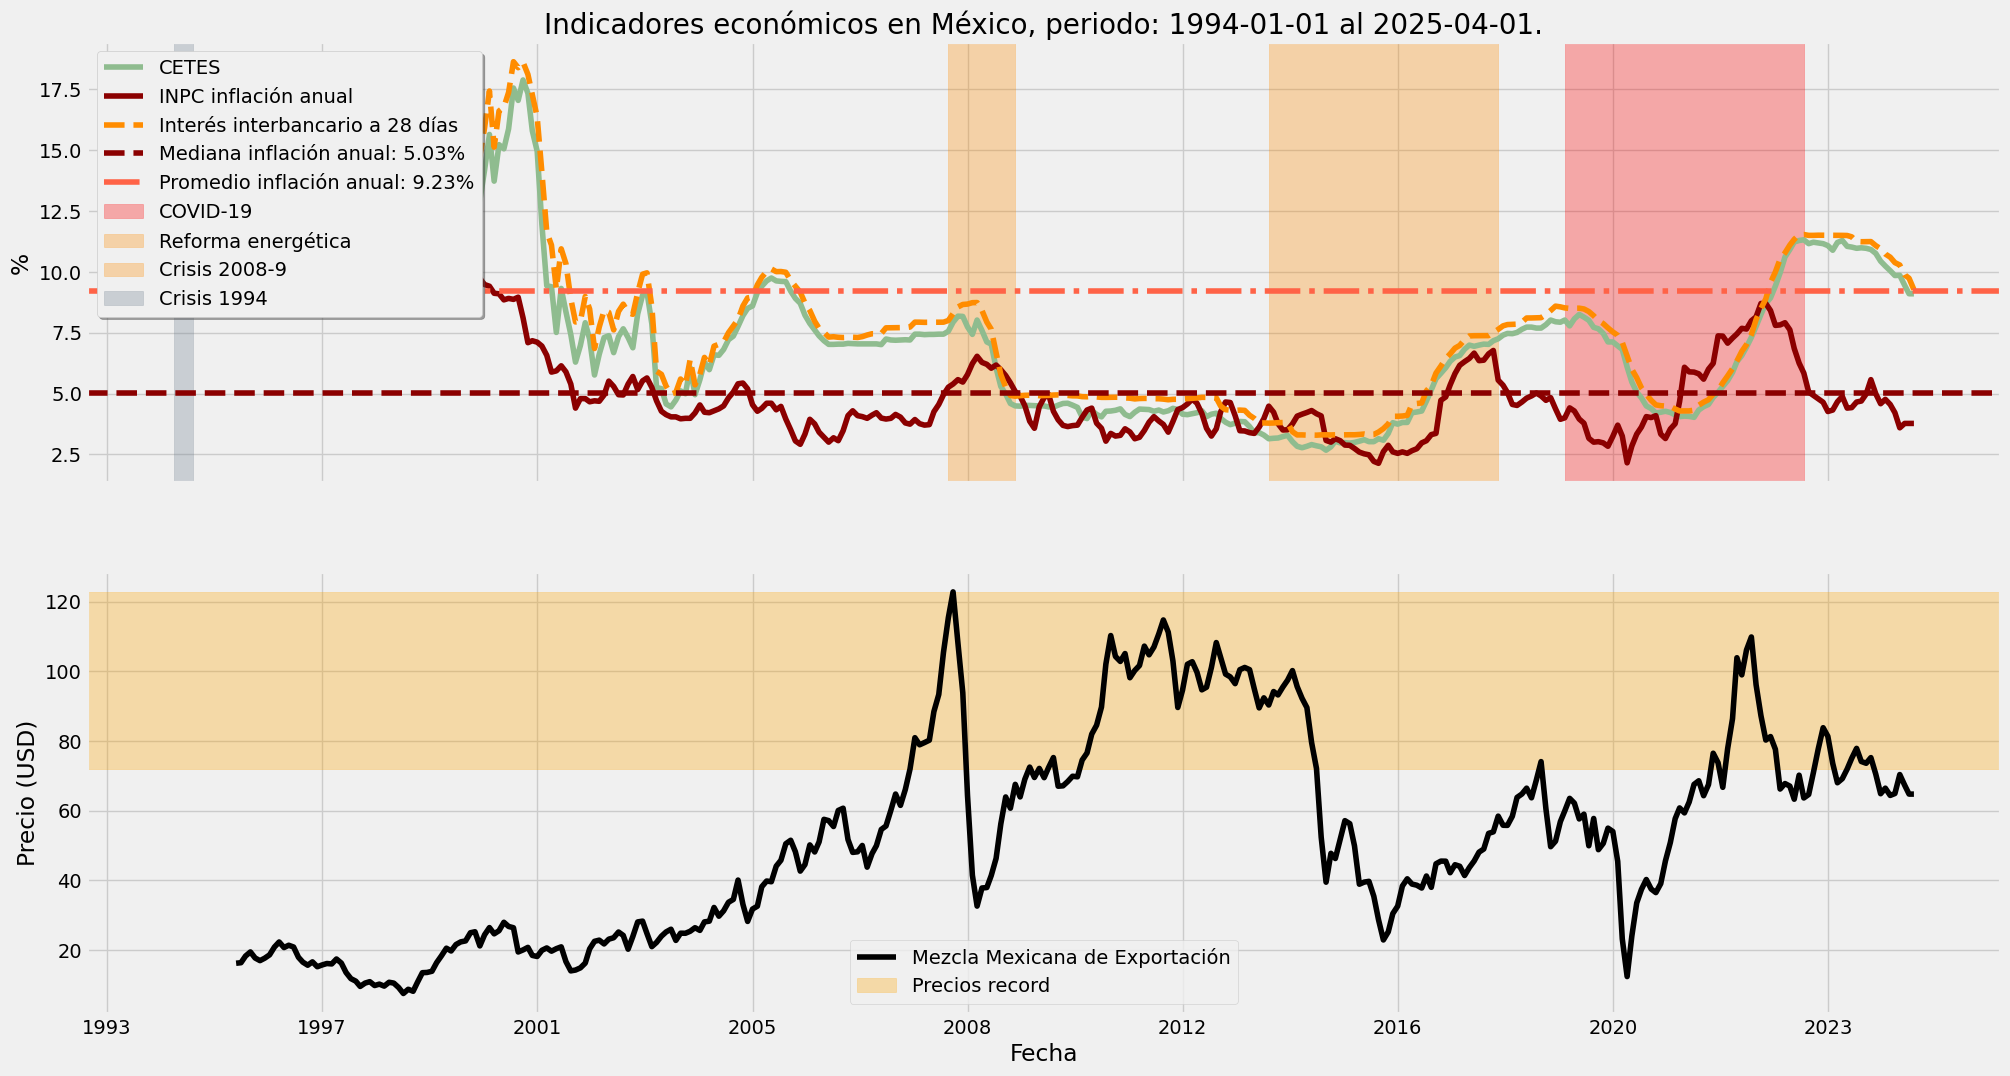

In [35]:
ultima_fecha = indicadores_mx.index[-1].date()
fecha_inicial = indicadores_mx.loc['2000'].index[0].date()
median = round(indicadores_mx['inflacion_anual'].median(), 2)
mean = round(indicadores_mx['inflacion_anual'].mean(), 2)
last_value = indicadores_mx.inflacion_anual[-1]

print(indicadores_mx.corr().round(2))
print("-"*40)
print(indicadores_mx.describe().round(2))
fig, ax = plt.subplots(2, 1, figsize=(22, 12), sharex=True)

sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='CETES', label='CETES', color='darkseagreen', ax=ax[0])
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='inflacion_anual', label='INPC inflación anual', color='darkred', ax=ax[0])
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='interes_interbancario_28', label='Interés interbancario a 28 días', linestyle='--', color='darkorange', ax=ax[0])

ax[0].set_title(f'Indicadores económicos en México, periodo: 1994-01-01 al {ultima_fecha}.', fontsize=20)
ax[0].set_xlabel('Fecha')
ax[0].set_ylabel('%')
ax[0].set_xticks(indicadores_mx.index[::45])

ax[0].axhline(indicadores_mx['inflacion_anual'].median(), label=f"Mediana inflación anual: {median}%", linestyle='--', color='darkred')
ax[0].axhline(indicadores_mx['inflacion_anual'].mean(), label=f"Promedio inflación anual: {mean}%", linestyle='dashdot', color='tomato')
ax[0].axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.3, label='COVID-19')
ax[0].axvspan('2014-01-01', '2018-01-01', color='darkorange', alpha=0.3, label='Reforma energética')
ax[0].axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.3, label='Crisis 2008-9')
ax[0].axvspan('1994-12-01', '1995-04-01', color='slategray', alpha=0.3, label='Crisis 1994')


ax[0].legend(loc='upper left', shadow=True)

sns.lineplot(data=indicadores_mx['1994':], x=indicadores_mx['1994':].index, y='MME', label='Mezcla Mexicana de Exportación', color='k', ax=ax[1])

ax[1].set_xlabel('Fecha')
ax[1].set_ylabel('Precio (USD)')

ax[1].axhspan(np.quantile(indicadores_mx['MME'].dropna(), 0.75), indicadores_mx.MME.max(), color='orange', label="Precios record", alpha=0.3)

plt.legend()
plt.savefig(f"./app/viz/mme_analysis_{today_str}.svg")
plt.show()

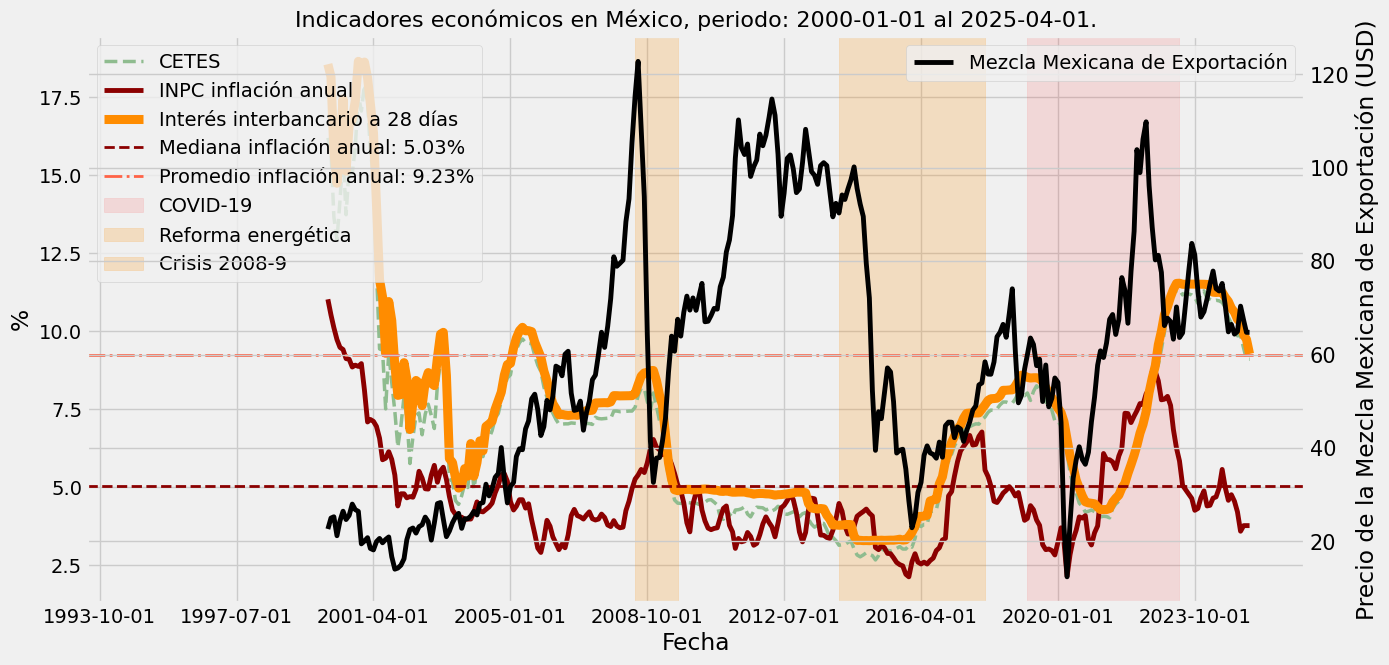

In [36]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='CETES', label='CETES', color='darkseagreen', linestyle='--', linewidth=2.5, ax=ax)
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='inflacion_anual', label='INPC inflación anual', color='darkred', linewidth=3.5, ax=ax)
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='interes_interbancario_28', label='Interés interbancario a 28 días', linewidth=6.5, color='darkorange', ax=ax)

ax2 = ax.twinx()
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='MME', label='Mezcla Mexicana de Exportación', color='black', linewidth=3.5, ax=ax2)
ax2.set_ylabel('Precio de la Mezcla Mexicana de Exportación (USD)')

ax.set_title(f'Indicadores económicos en México, periodo: {fecha_inicial} al {ultima_fecha}.', fontsize=16)
ax.set_xlabel('Fecha')
ax.set_ylabel('%')
ax.set_xticks(indicadores_mx.index[::45])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.axhline(indicadores_mx['inflacion_anual'].median(), label=f"Mediana inflación anual: {median}%", linestyle='--', linewidth=2, color='darkred')
ax.axhline(indicadores_mx['inflacion_anual'].mean(), label=f"Promedio inflación anual: {mean}%", linestyle='dashdot', linewidth=2, color='tomato')
ax.axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.1, label='COVID-19')
ax.axvspan('2014-01-01', '2018-01-01', color='darkorange', alpha=0.2, label='Reforma energética')
ax.axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.2, label='Crisis 2008-9')
ax.axvspan('1994-12-01', '1995-04-01', color='slategray', alpha=0.0)

ax.legend(loc='upper left')
plt.savefig(f"./app/viz/analisis_CETES_INPC_{today_str}.svg")
plt.show()

                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\1588037540.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = indicadores_mx.inflacion_anual[-1]
C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\1588037540.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value_iit = round(indicadores_mx.interes_interbancario_28[-1], 2)


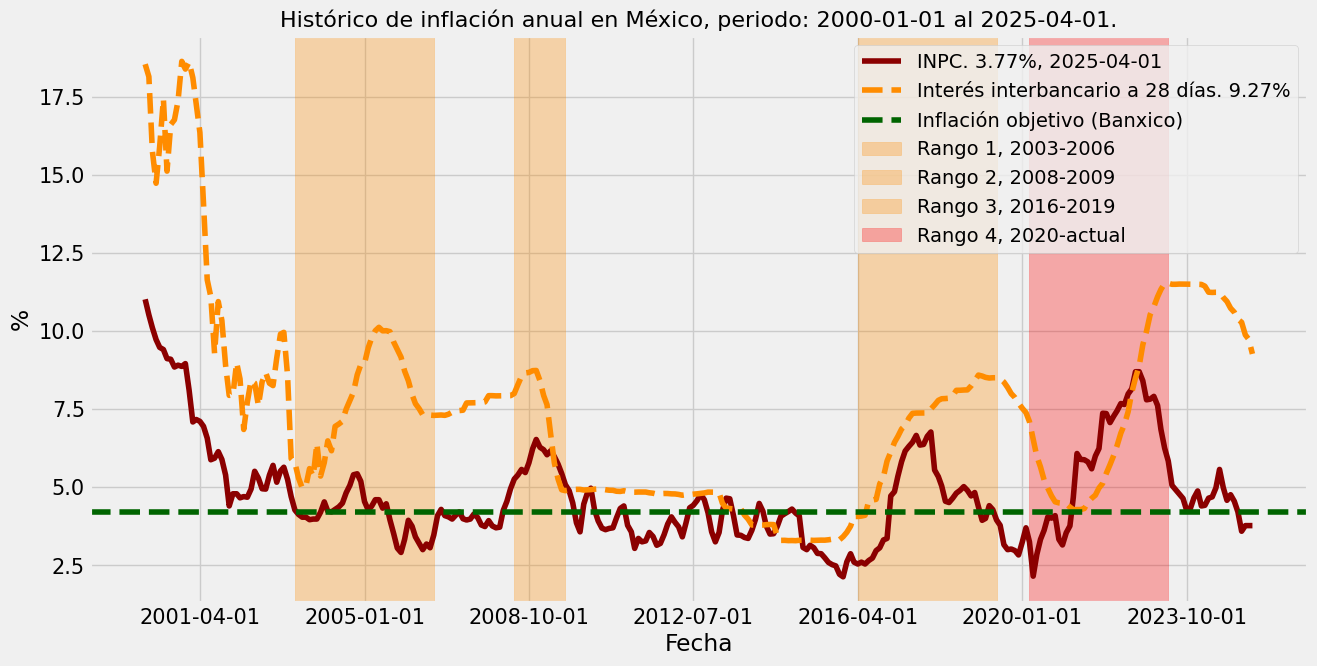

In [37]:
ultima_fecha = indicadores_mx.index[-1].date()
fecha_inicial = indicadores_mx.loc['2000':].index[0].date()

print(indicadores_mx.corr().round(2))
print("-"*40)
print(indicadores_mx.describe().round(2))
fig, ax = plt.subplots(figsize=(14, 7))

last_value = indicadores_mx.inflacion_anual[-1]
last_value_iit = round(indicadores_mx.interes_interbancario_28[-1], 2)
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='inflacion_anual', label=f"INPC. {last_value}%, {ultima_fecha}", color='darkred', ax=ax)
sns.lineplot(data=indicadores_mx['2000':], x=indicadores_mx['2000':].index, y='interes_interbancario_28', label=f"Interés interbancario a 28 días. {last_value_iit}%", linestyle='--', color='darkorange', ax=ax)

ax.set_title(f"Histórico de inflación anual en México, periodo: {fecha_inicial} al {ultima_fecha}.", fontsize=16)
ax.set_xlabel('Fecha')
ax.set_ylabel('%')
ax.set_xticks(indicadores_mx.index[::45])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.axhline(4.2, label="Inflación objetivo (Banxico)", color="darkgreen", linestyle='--')

ax.axvspan('2003-06-01', '2006-08-01', color='darkorange', alpha=0.3, label='Rango 1, 2003-2006')
ax.axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.3, label='Rango 2, 2008-2009')
ax.axvspan('2016-04-01', '2019-06-01', color='darkorange', alpha=0.3, label='Rango 3, 2016-2019')
ax.axvspan('2020-03-01', '2023-05-01', color='red', alpha=0.3, label='Rango 4, 2020-actual')

plt.legend()
plt.savefig(f"./app/viz/inpc_iit_{today_str}.svg")
plt.show()

                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

C:\Users\ecast\AppData\Local\Temp\ipykernel_26532\2835150278.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_value = indicadores_mx.inflacion_anual[-1]


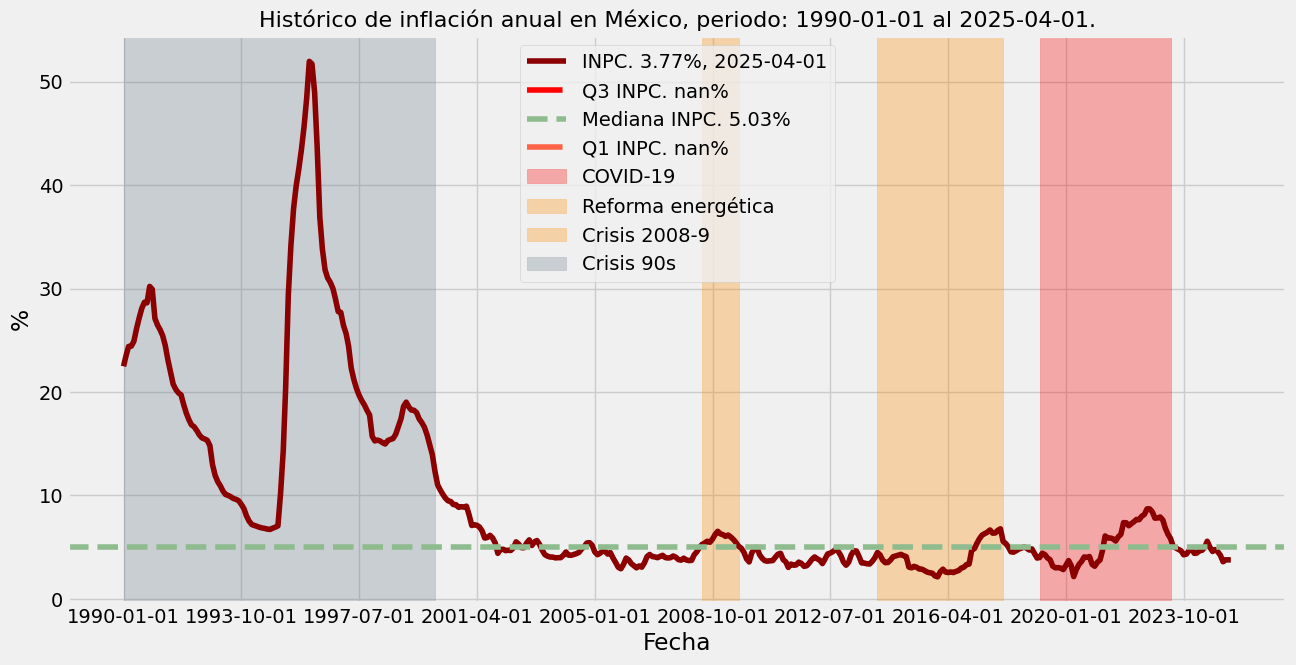

In [38]:
ultima_fecha = indicadores_mx.index[-1].date()
fecha_inicial = indicadores_mx.index[0].date()

print(indicadores_mx.corr().round(2))
print("-"*40)
print(indicadores_mx.describe().round(2))
fig, ax = plt.subplots(figsize=(14, 7))

last_value = indicadores_mx.inflacion_anual[-1]
sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='inflacion_anual', label=f"INPC. {last_value}%, {ultima_fecha}", color='darkred', ax=ax)

ax.set_title(f"Histórico de inflación anual en México, periodo: {fecha_inicial} al {ultima_fecha}.", fontsize=16)
ax.set_xlabel('Fecha')
ax.set_ylabel('%')
ax.set_xticks(indicadores_mx.index[::45])

median = round(indicadores_mx['inflacion_anual'].median(), 2)
q1 = np.quantile(indicadores_mx['inflacion_anual'], 0.25)
q3 = np.quantile(indicadores_mx['inflacion_anual'], 0.75)
ax.axhline(np.quantile(indicadores_mx['inflacion_anual'], 0.75), label=f"Q3 INPC. {q3}%", linestyle='dashdot', color='red')
ax.axhline(indicadores_mx['inflacion_anual'].median(), label=f"Mediana INPC. {median}%", linestyle='--', color='darkseagreen')
ax.axhline(np.quantile(indicadores_mx['inflacion_anual'], 0.25), label=f"Q1 INPC. {q1}%", linestyle='dashdot', color='tomato')

ax.axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.3, label='COVID-19')
ax.axvspan('2014-01-01', '2018-01-01', color='darkorange', alpha=0.3, label='Reforma energética')
ax.axvspan('2008-06-01', '2009-08-01', color='darkorange', alpha=0.3, label='Crisis 2008-9')
ax.axvspan('1990-01-01', '1999-12-01', color='slategray', alpha=0.3, label='Crisis 90s')

plt.legend()
plt.savefig(f"./app/viz/analisis_{today_str}.svg")
plt.show()

       Hcs_liq_Mbd   Aceite_Mbd  Condensado_Mbd  Gas_asociado_MMpcd  \
count  1536.000000  1536.000000     1536.000000         1536.000000   
mean   1162.924375  1151.406417       11.517958         1580.616674   
std    1196.032354  1191.974982       38.856558         1661.957493   
min       0.009015     0.009015        0.000000            0.003800   
25%     114.132265   113.394074        0.227127           46.629946   
50%     292.700754   270.784247        2.709084          722.180959   
75%    2439.303670  2437.007198        6.110402         3101.894721   
max    3462.627930  3452.744708      297.276746         4992.972606   

       Gas_no_asociado_MMpcd     Agua_Mbd  
count            1536.000000  1536.000000  
mean              628.707307   121.177623  
std               673.072011   161.737109  
min                 0.000000     0.000000  
25%                 5.008714     2.685458  
50%               479.258769    62.418050  
75%               920.727995   148.095604  
max     

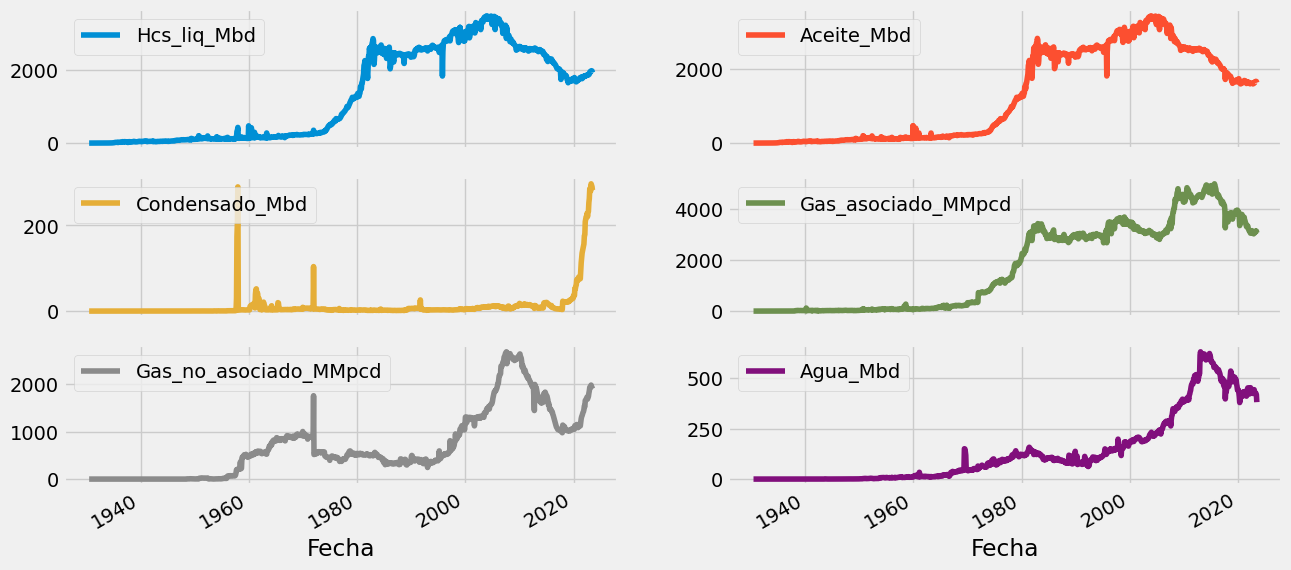

In [39]:
print(produccion_acumulada.describe())

produccion_acumulada.plot(figsize=(14, 7), subplots=True, layout=(3, 2))
plt.show()

In [40]:
indicadores_mx.tail()

dls_mxn       UDI        MME  CETES  inflacion_anual  \
fecha                                                                
2024-12-01  20.266055  8.331915  64.934091   9.85             4.21   
2025-01-01  20.549018  8.362028  70.373913   9.86             3.59   
2025-02-01  20.457137  8.385948  67.334500   9.45             3.77   
2025-03-01  20.241745  8.410383  64.768000   9.10             3.77   
2025-04-01  20.358700  8.422654  64.768000   9.10             3.77   

            inflacion_subyacente  interes_interbancario_28  
fecha                                                       
2024-12-01                  3.65                 10.380720  
2025-01-01                  3.66                 10.282523  
2025-02-01                  3.65                  9.878884  
2025-03-01                  3.65                  9.739170  
2025-04-01                  3.65                  9.270400

In [41]:
indicadores_mx

dls_mxn       UDI        MME  CETES  inflacion_anual  \
fecha                                                                
1990-01-01   2.701659       NaN        NaN  41.29            22.48   
1990-02-01   2.731658       NaN        NaN  45.20            23.57   
1990-03-01   2.760357       NaN        NaN  46.65            24.40   
1990-04-01   2.791184       NaN        NaN  44.64            24.43   
1990-05-01   2.821791       NaN        NaN  36.92            24.89   
...               ...       ...        ...    ...              ...   
2024-12-01  20.266055  8.331915  64.934091   9.85             4.21   
2025-01-01  20.549018  8.362028  70.373913   9.86             3.59   
2025-02-01  20.457137  8.385948  67.334500   9.45             3.77   
2025-03-01  20.241745  8.410383  64.768000   9.10             3.77   
2025-04-01  20.358700  8.422654  64.768000   9.10             3.77   

            inflacion_subyacente  interes_interbancario_28  
fecha                                                       
1990-01-01                 22.23                       NaN  
1990-02-01                 22.02                       NaN  
1990-03-01                 22.21                       NaN  
1990-04-01                 23.11                       NaN  
1990-05-01                 24.66                       NaN  
...                          ...                       ...  
2024-12-01                  3.65                 10.380720  
2025-01-01                  3.66                 10.282523  
2025-02-01                  3.65                  9.878884  
2025-03-01                  3.65                  9.739170  
2025-04-01                  3.65                  9.270400  

[424 rows x 7 columns]

In [46]:
indicadores_mx["MME"].iloc[-1]

64.768

                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

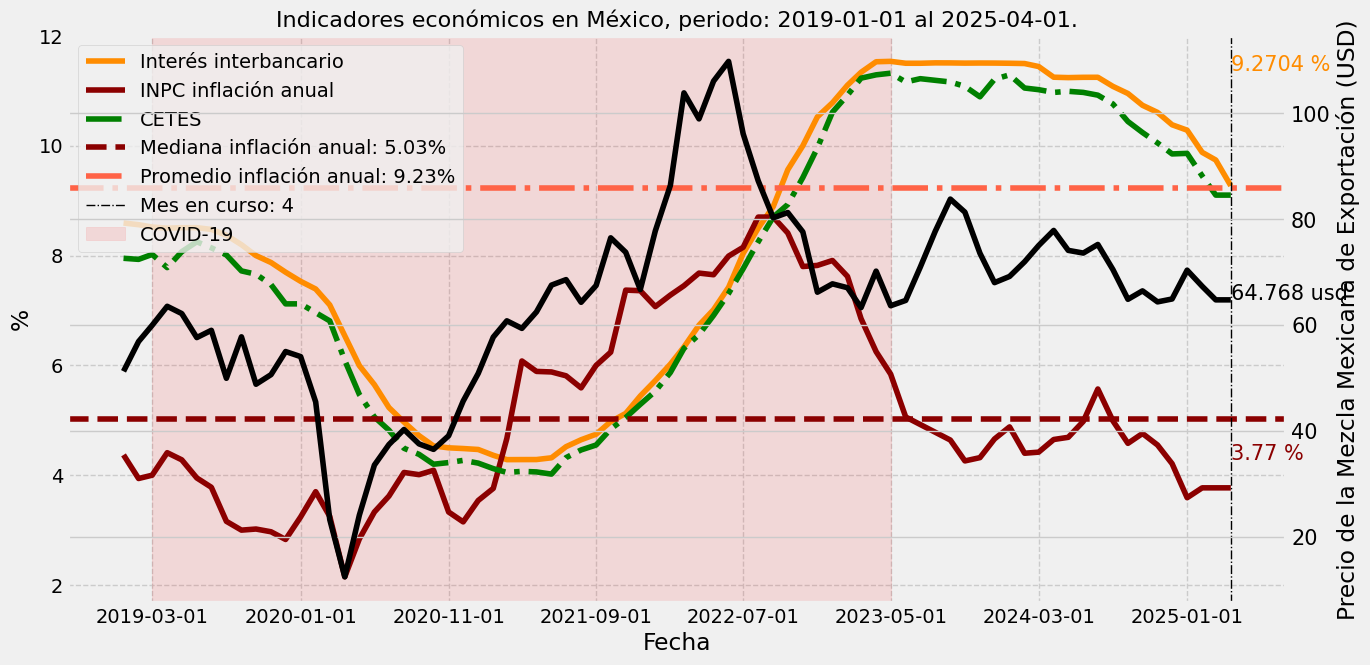

In [53]:
fecha_inicial = indicadores_mx.loc['2019':].index[0].date()

print(indicadores_mx.corr().round(2))
print("-"*80)
print(indicadores_mx.describe().round(2))
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='interes_interbancario_28', label='Interés interbancario', color='darkorange')
sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='inflacion_anual', label='INPC inflación anual', color='darkred')
sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='CETES', label='CETES', color='green', linestyle='dashdot')

ax2 = ax.twinx()
sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='MME', color='black', ax=ax2)
ax2.set_ylabel('Precio de la Mezcla Mexicana de Exportación (USD)')

ax.set_title(f'Indicadores económicos en México, periodo: {fecha_inicial} al {ultima_fecha}.', fontsize=16)
ax.set_xlabel('Fecha')
ax.set_ylabel('%')

plt.xticks(indicadores_mx.index[::10], rotation=60, fontsize=15)
plt.yticks(fontsize=15)

ax.axhline(indicadores_mx['inflacion_anual'].median(), label=f"Mediana inflación anual: {median}%", linestyle='--', color='darkred')
ax.axhline(indicadores_mx['inflacion_anual'].mean(), label=f"Promedio inflación anual: {mean}%", linestyle='dashdot', color='tomato')
ax.axvline(ultima_fecha, label='Mes en curso: {}'.format(ultima_fecha.month), linestyle='dashdot', linewidth=1, color='black')
ax.axvspan('2019-03-01', '2023-05-01', color='red', alpha=0.1, label='COVID-19')

ax.grid(True, linestyle='--')
ax.legend(loc='upper left')

plt.text(ultima_fecha, 108, f"{str(indicadores_mx['interes_interbancario_28'].iloc[-1])} %", fontsize=15, color='darkorange')
plt.text(ultima_fecha, indicadores_mx['MME'].iloc[-1], f"{str(indicadores_mx['MME'].iloc[-1])} usd", fontsize=15)
plt.text(ultima_fecha, 34.5, f"{str(indicadores_mx['inflacion_anual'].iloc[-1])} %", fontsize=15, color='darkred')

plt.savefig(f"./app/viz/analisis_CETES_INPC_2019-{today_str}.svg")
plt.show()

In [54]:
indicadores_mx.loc[indicadores_mx.index == '2023-09-01'].transpose()

fecha                     2023-09-01
dls_mxn                    17.111300
UDI                         7.831096
MME                        83.810909
CETES                      11.160000
inflacion_anual             4.640000
inflacion_subyacente        6.080000
interes_interbancario_28   11.507000

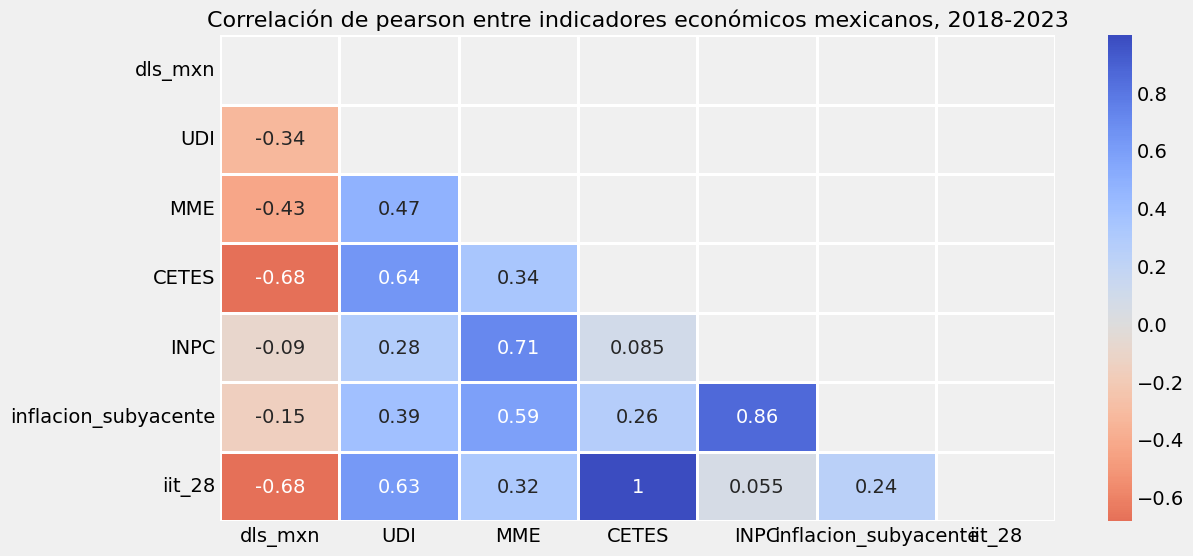

In [55]:
corr_df = indicadores_mx['2018':].rename(columns={"inflacion_anual": "INPC", "interes_interbancario_28": "iit_28"})
type_corr = "pearson"

corr = corr_df.corr(type_corr)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm_r', center=0, linewidth=1)

plt.title(f"Correlación de {type_corr} entre indicadores económicos mexicanos, 2018-2023", fontsize=16)
plt.xticks(rotation=0)

plt.grid(visible=False)
plt.savefig(f"./app/viz/pearson_correlation_ajustado-{today_str}.svg")
plt.show()

* The Pearson Correlation between CETES and INPC is 0.86, we can consider good-high correlation. 

By descriptive statistics we can confirm that: 
* The median of CETES is 7.44%, while median of INPC is 5.18
* INPC (inflacion anual) at 2023-06-01 is 5.4%, that means is close to median.

                          dls_mxn   UDI   MME  CETES  inflacion_anual  \
dls_mxn                      1.00  0.92  0.35  -0.55            -0.55   
UDI                          0.92  1.00  0.56  -0.55            -0.58   
MME                          0.35  0.56  1.00  -0.55            -0.45   
CETES                       -0.55 -0.55 -0.55   1.00             0.85   
inflacion_anual             -0.55 -0.58 -0.45   0.85             1.00   
inflacion_subyacente        -0.56 -0.58 -0.47   0.86             1.00   
interes_interbancario_28    -0.50 -0.57 -0.56   1.00             0.85   

                          inflacion_subyacente  interes_interbancario_28  
dls_mxn                                  -0.56                     -0.50  
UDI                                      -0.58                     -0.57  
MME                                      -0.47                     -0.56  
CETES                                     0.86                      1.00  
inflacion_anual                         

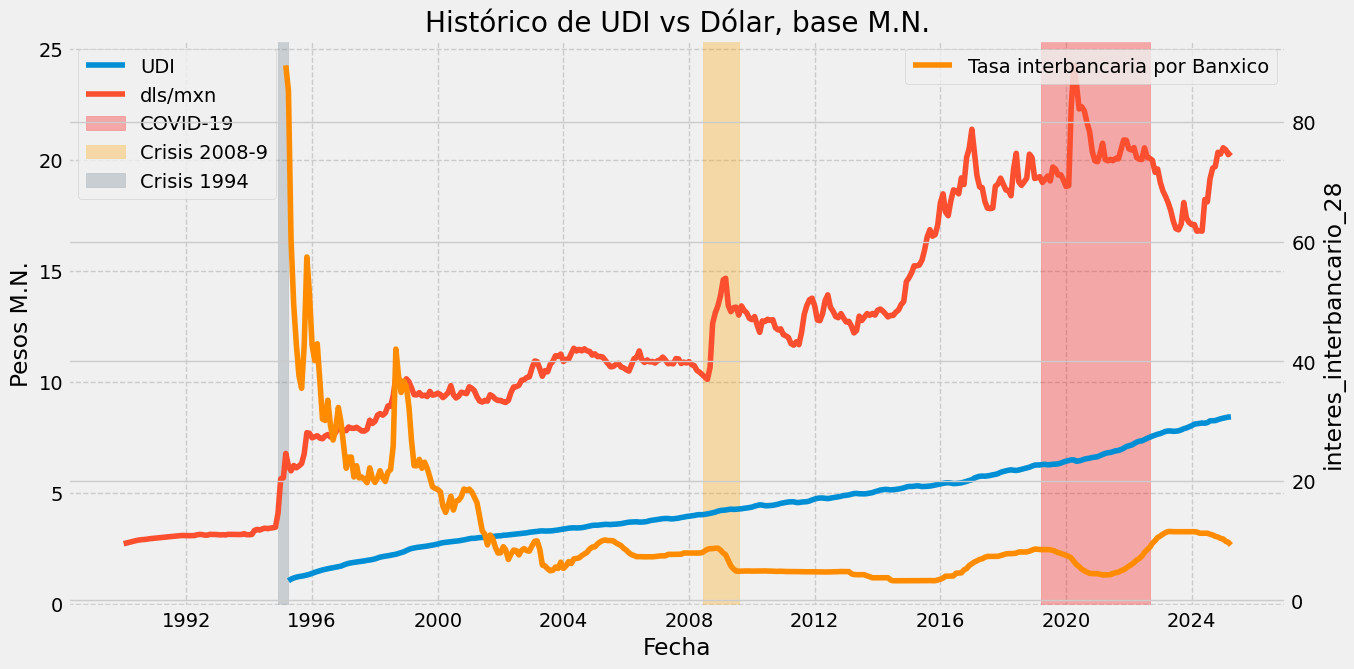

In [56]:
print(indicadores_mx.corr().round(2))
print("-"*25)
print(indicadores_mx.describe().round(2))

fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='UDI', label='UDI')
sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='dls_mxn', label='dls/mxn')

ax2 = ax.twinx()
sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='interes_interbancario_28', color='darkorange',label='Tasa interbancaria por Banxico', ax=ax2)

ax.set_title('Histórico de UDI vs Dólar, base M.N.')
ax.set_xlabel('Fecha')
ax.set_ylabel('Pesos M.N.')

ax.axvspan('2019-03-11', '2022-09-01', color='red', alpha=0.3, label='COVID-19')
ax.axvspan('2008-06-11', '2009-08-01', color='orange', alpha=0.3, label='Crisis 2008-9')
ax.axvspan('1994-12-01', '1995-04-01', color='slategray', alpha=0.3, label='Crisis 1994')

ax.grid(True, linestyle='--')
ax.legend()
plt.show()

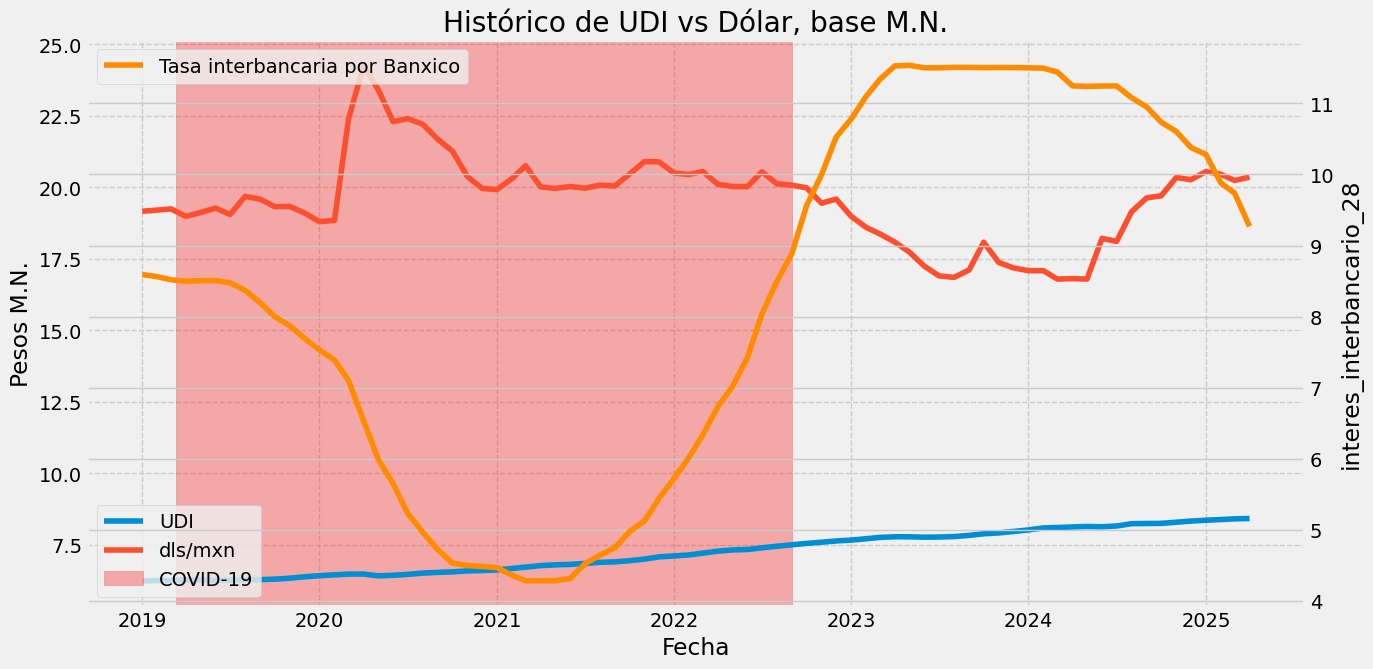

In [57]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='UDI', label='UDI')
sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='dls_mxn', label='dls/mxn')

ax2 = ax.twinx()
sns.lineplot(data=indicadores_mx['2019':], x=indicadores_mx['2019':].index, y='interes_interbancario_28', color='darkorange',label='Tasa interbancaria por Banxico', ax=ax2)

ax.set_title('Histórico de UDI vs Dólar, base M.N.')
ax.set_xlabel('Fecha')
ax.set_ylabel('Pesos M.N.')

ax.axvspan('2019-03-11', '2022-09-01', color='red', alpha=0.3, label='COVID-19')

ax.grid(True, linestyle='--')
ax.legend(loc='lower left')
plt.show()

          MME   CETES  inflacion_anual  inflacion_subyacente  \
count  352.00  423.00           422.00                422.00   
mean    52.55   11.86             9.23                  8.93   
std     28.97   10.49             9.14                  9.13   
min      7.58    2.67             2.13                  2.30   
25%     25.16    4.83             3.98                  3.64   
50%     50.12    7.73             5.03                  4.46   
75%     72.01   15.80             9.72                 10.47   
max    122.78   74.75            51.97                 50.60   

       interes_interbancario_28  
count                    362.00  
mean                      11.30  
std                       11.02  
min                        3.29  
25%                        4.92  
50%                        7.85  
75%                       11.25  
max                       89.48  
---------------------------------------------------------------------------------------------------------------------

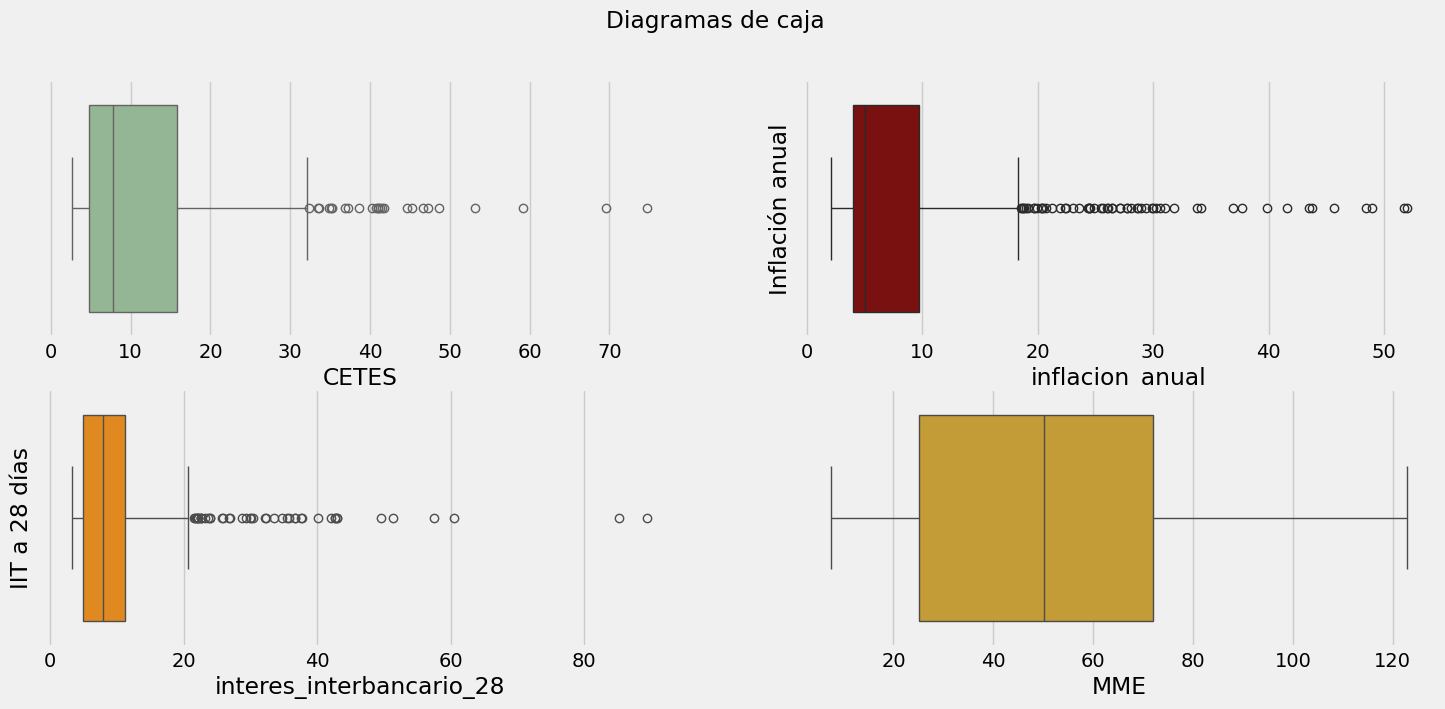

In [58]:
print(indicadores_mx.drop(["UDI", "dls_mxn"], axis=1).describe().round(2))
print("--"*100)
# print(indicadores.describe().round(2))

fig, ax = plt.subplots(2, 2, figsize=(16, 7))

sns.boxplot(data=indicadores_mx, x='CETES', color='darkseagreen', orient='h', ax=ax[0,0])
sns.boxplot(data=indicadores_mx, x='inflacion_anual', color='darkred', orient='h', ax=ax[0,1])
sns.boxplot(data=indicadores_mx, x='interes_interbancario_28', color='darkorange', orient='h', ax=ax[1,0])
sns.boxplot(data=indicadores_mx, x='MME', color='goldenrod', orient='h', ax=ax[1,1])

ax[0, 1].set_ylabel('Inflación anual')
ax[1, 0].set_ylabel('IIT a 28 días')

plt.suptitle('Diagramas de caja')
plt.savefig(f"./app/viz/boxplots-{today_str}.svg")
plt.show()

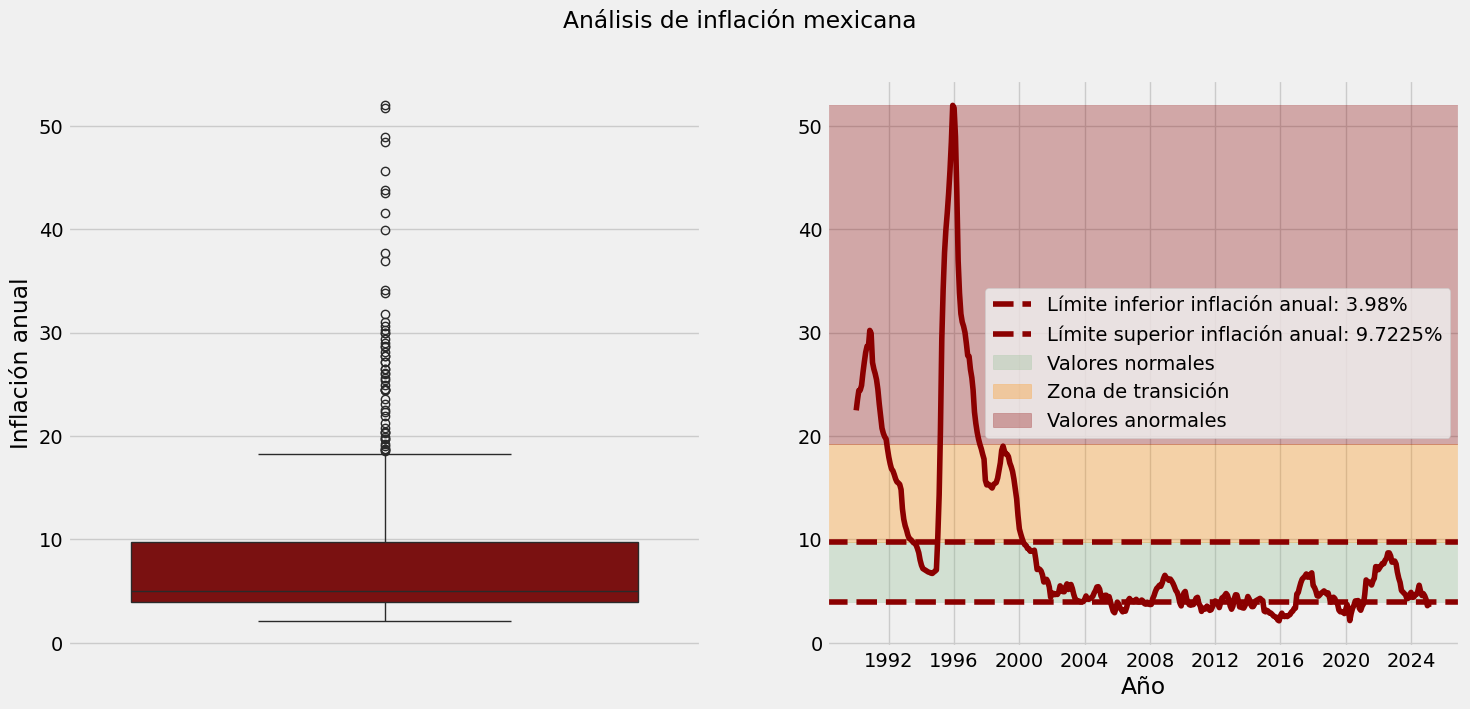

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

sns.boxplot(data=indicadores_mx, y='inflacion_anual', color='darkred', orient='v', ax=ax[0])
sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='inflacion_anual', color='darkred', ax=ax[1])

q1 = np.quantile(indicadores_mx["inflacion_anual"].dropna(), 0.25)
q3 = np.quantile(indicadores_mx["inflacion_anual"].dropna(), 0.75)

ax[1].axhline(q1, label=f"Límite inferior inflación anual: {q1}%", linestyle='--', color='darkred')
ax[1].axhline(q3, label=f"Límite superior inflación anual: {q3}%", linestyle='--', color='darkred')

ax[1].axhspan(q1, q3, color='darkseagreen', alpha=0.3, label='Valores normales')
ax[1].axhspan(q3, 19.22, color='darkorange', alpha=0.3, label='Zona de transición')
ax[1].axhspan(19.22, 51.97, color='darkred', alpha=0.3, label='Valores anormales')

ax[0].set_ylabel("Inflación anual")
ax[1].set_xlabel("Año")
ax[1].set_ylabel("")

plt.legend()

plt.suptitle("Análisis de inflación mexicana")

plt.savefig(f"./app/viz/analisis_inflacionario_storytelling-{today_str}.svg")
plt.show()

In [60]:
indicadores_mx["type_MME"] = ["normal" if 24.7 <= row <= 70.2 else "anormal" for row in indicadores_mx["MME"]]

In [61]:
indicadores_mx.MME.describe().round(2)

count    352.00
mean      52.55
std       28.97
min        7.58
25%       25.16
50%       50.12
75%       72.01
max      122.78
Name: MME, dtype: float64

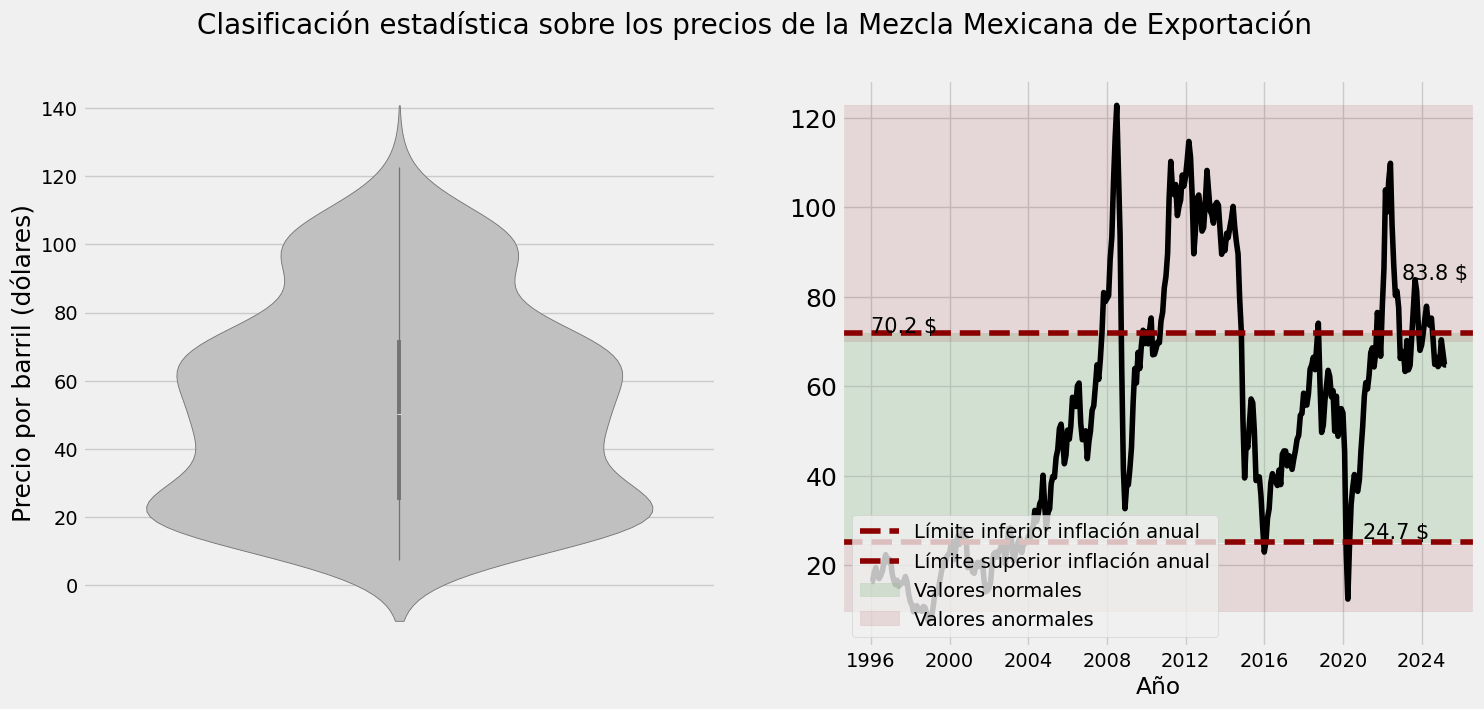

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# sns.boxplot(data=indicadores_mx, y='MME', color='silver', orient='v', ax=ax[0])
sns.violinplot(data=indicadores_mx, y='MME', color='silver', orient='v', inner="box", density_norm="count", ax=ax[0])
# sns.swarmplot(data=indicadores_mx, y='MME', color='k', orient='v', ax=ax[0])
sns.lineplot(data=indicadores_mx, x=indicadores_mx.index, y='MME', color='black', ax=ax[1])

q1_mme = np.quantile(indicadores_mx["MME"].dropna(), 0.25)
q3_mme = np.quantile(indicadores_mx["MME"].dropna(), 0.75)

ax[1].axhline(q1_mme, label="Límite inferior inflación anual", linestyle='--', color='darkred')
ax[1].axhline(q3_mme, label="Límite superior inflación anual", linestyle='--', color='darkred')

ax[1].axhspan(q1_mme, q3_mme, color='darkseagreen', alpha=0.3, label='Valores normales')
ax[1].axhspan(q3, 24.69, color='darkred', alpha=0.1)
ax[1].axhspan(70.2, indicadores_mx["MME"].max(), color='darkred', alpha=0.1, label='Valores anormales')

ax[0].set_ylabel("Precio por barril (dólares)", fontsize=18)
ax[1].set_xlabel("Año")
ax[1].set_ylabel("")

plt.yticks(fontsize=18)

plt.text(indicadores_mx['1996':].index[0].date(), 72, '70.2 $', fontsize=15)
plt.text(indicadores_mx['2021':].index[0].date(), 26, '24.7 $', fontsize=15)
plt.text(indicadores_mx['2023':].index[0].date(), 83.8, '83.8 $', fontsize=15, color='black')

plt.legend(loc="lower left")

plt.suptitle("Clasificación estadística sobre los precios de la Mezcla Mexicana de Exportación", fontsize=20)

plt.savefig(f"./app/viz/analisis_mme_storytelling-{today_str}.svg")
plt.show()

       interes_interbancario_28     MME
count                    362.00  352.00
mean                      11.30   52.55
std                       11.02   28.97
min                        3.29    7.58
25%                        4.92   25.16
50%                        7.85   50.12
75%                       11.25   72.01
max                       89.48  122.78
------------------------------


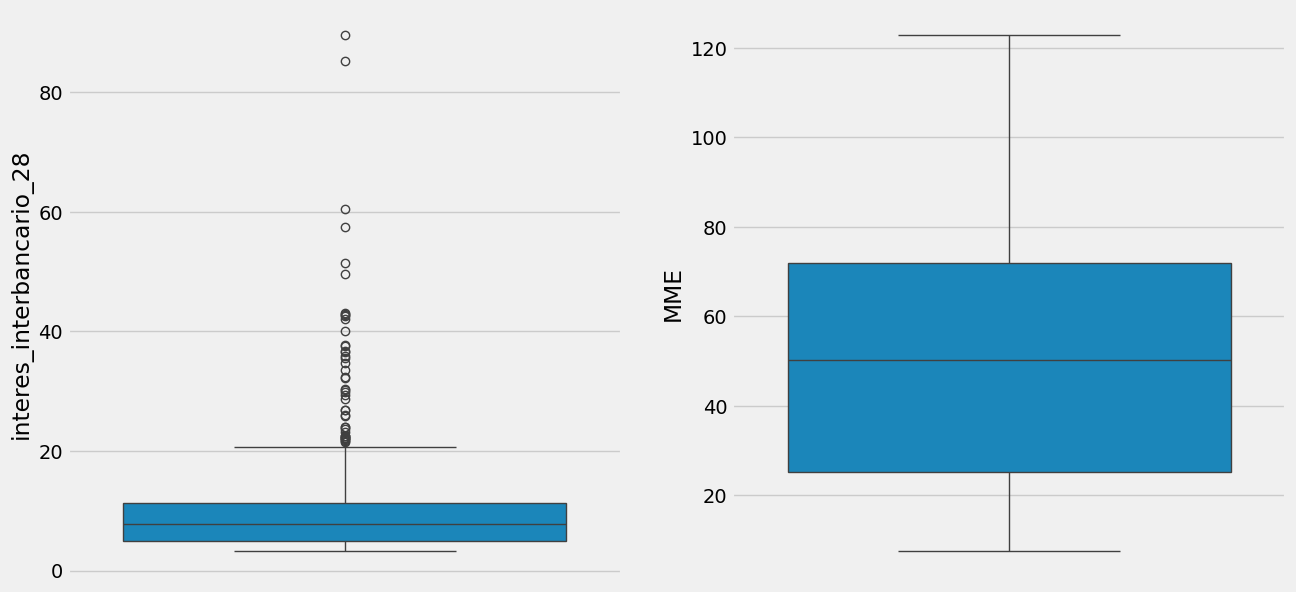

In [63]:
print(indicadores_mx[["interes_interbancario_28", "MME"]].describe().round(2))
print("-"*30)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.boxplot(data=indicadores_mx, y='interes_interbancario_28', ax=ax[0])
sns.boxplot(data=indicadores_mx, y='MME', ax=ax[1])

plt.show()

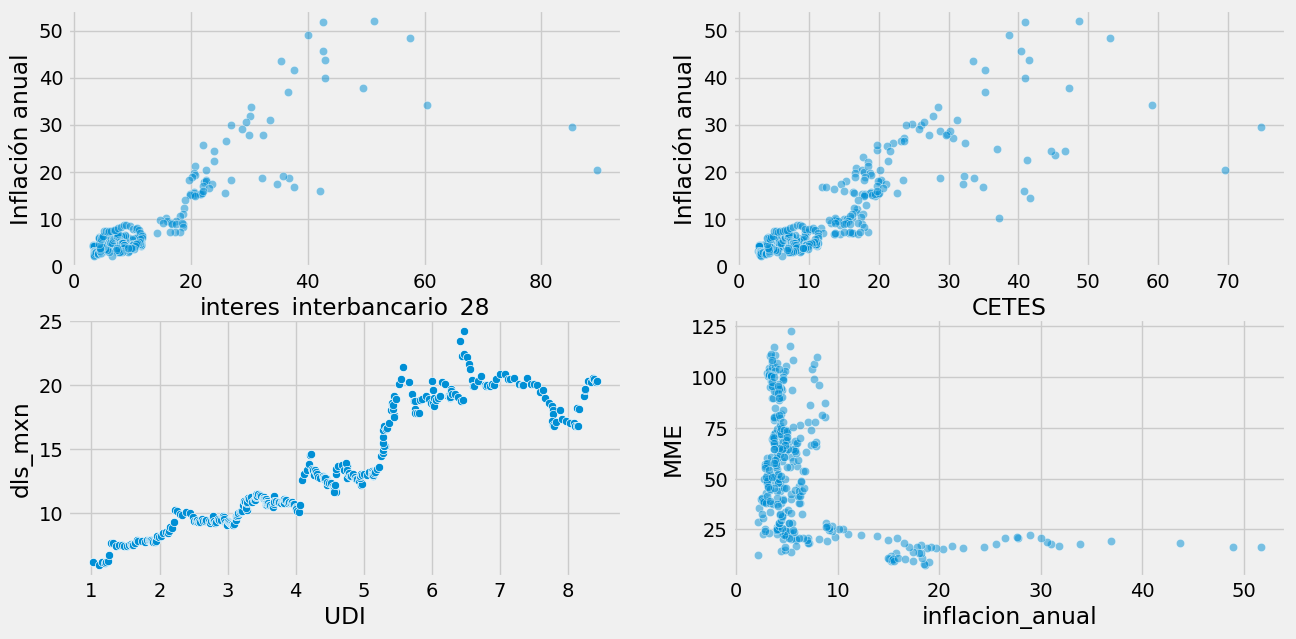

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

sns.scatterplot(x=indicadores_mx['interes_interbancario_28'], y=indicadores_mx['inflacion_anual'], ax=ax[0,0], alpha=0.5)
sns.scatterplot(data=indicadores_mx, x='CETES', y='inflacion_anual', ax=ax[0,1], alpha=0.5)
sns.scatterplot(x=indicadores_mx['UDI'], y=indicadores_mx['dls_mxn'], ax=ax[1,0])
sns.scatterplot(x=indicadores_mx['inflacion_anual'], y=indicadores_mx['MME'], ax=ax[1,1], alpha=0.5)

ax[0,0].set_ylabel("Inflación anual")
ax[0,1].set_ylabel("Inflación anual")
ax[1,0].set_xlabel("UDI")

plt.show()

<Figure size 1000x1000 with 0 Axes>

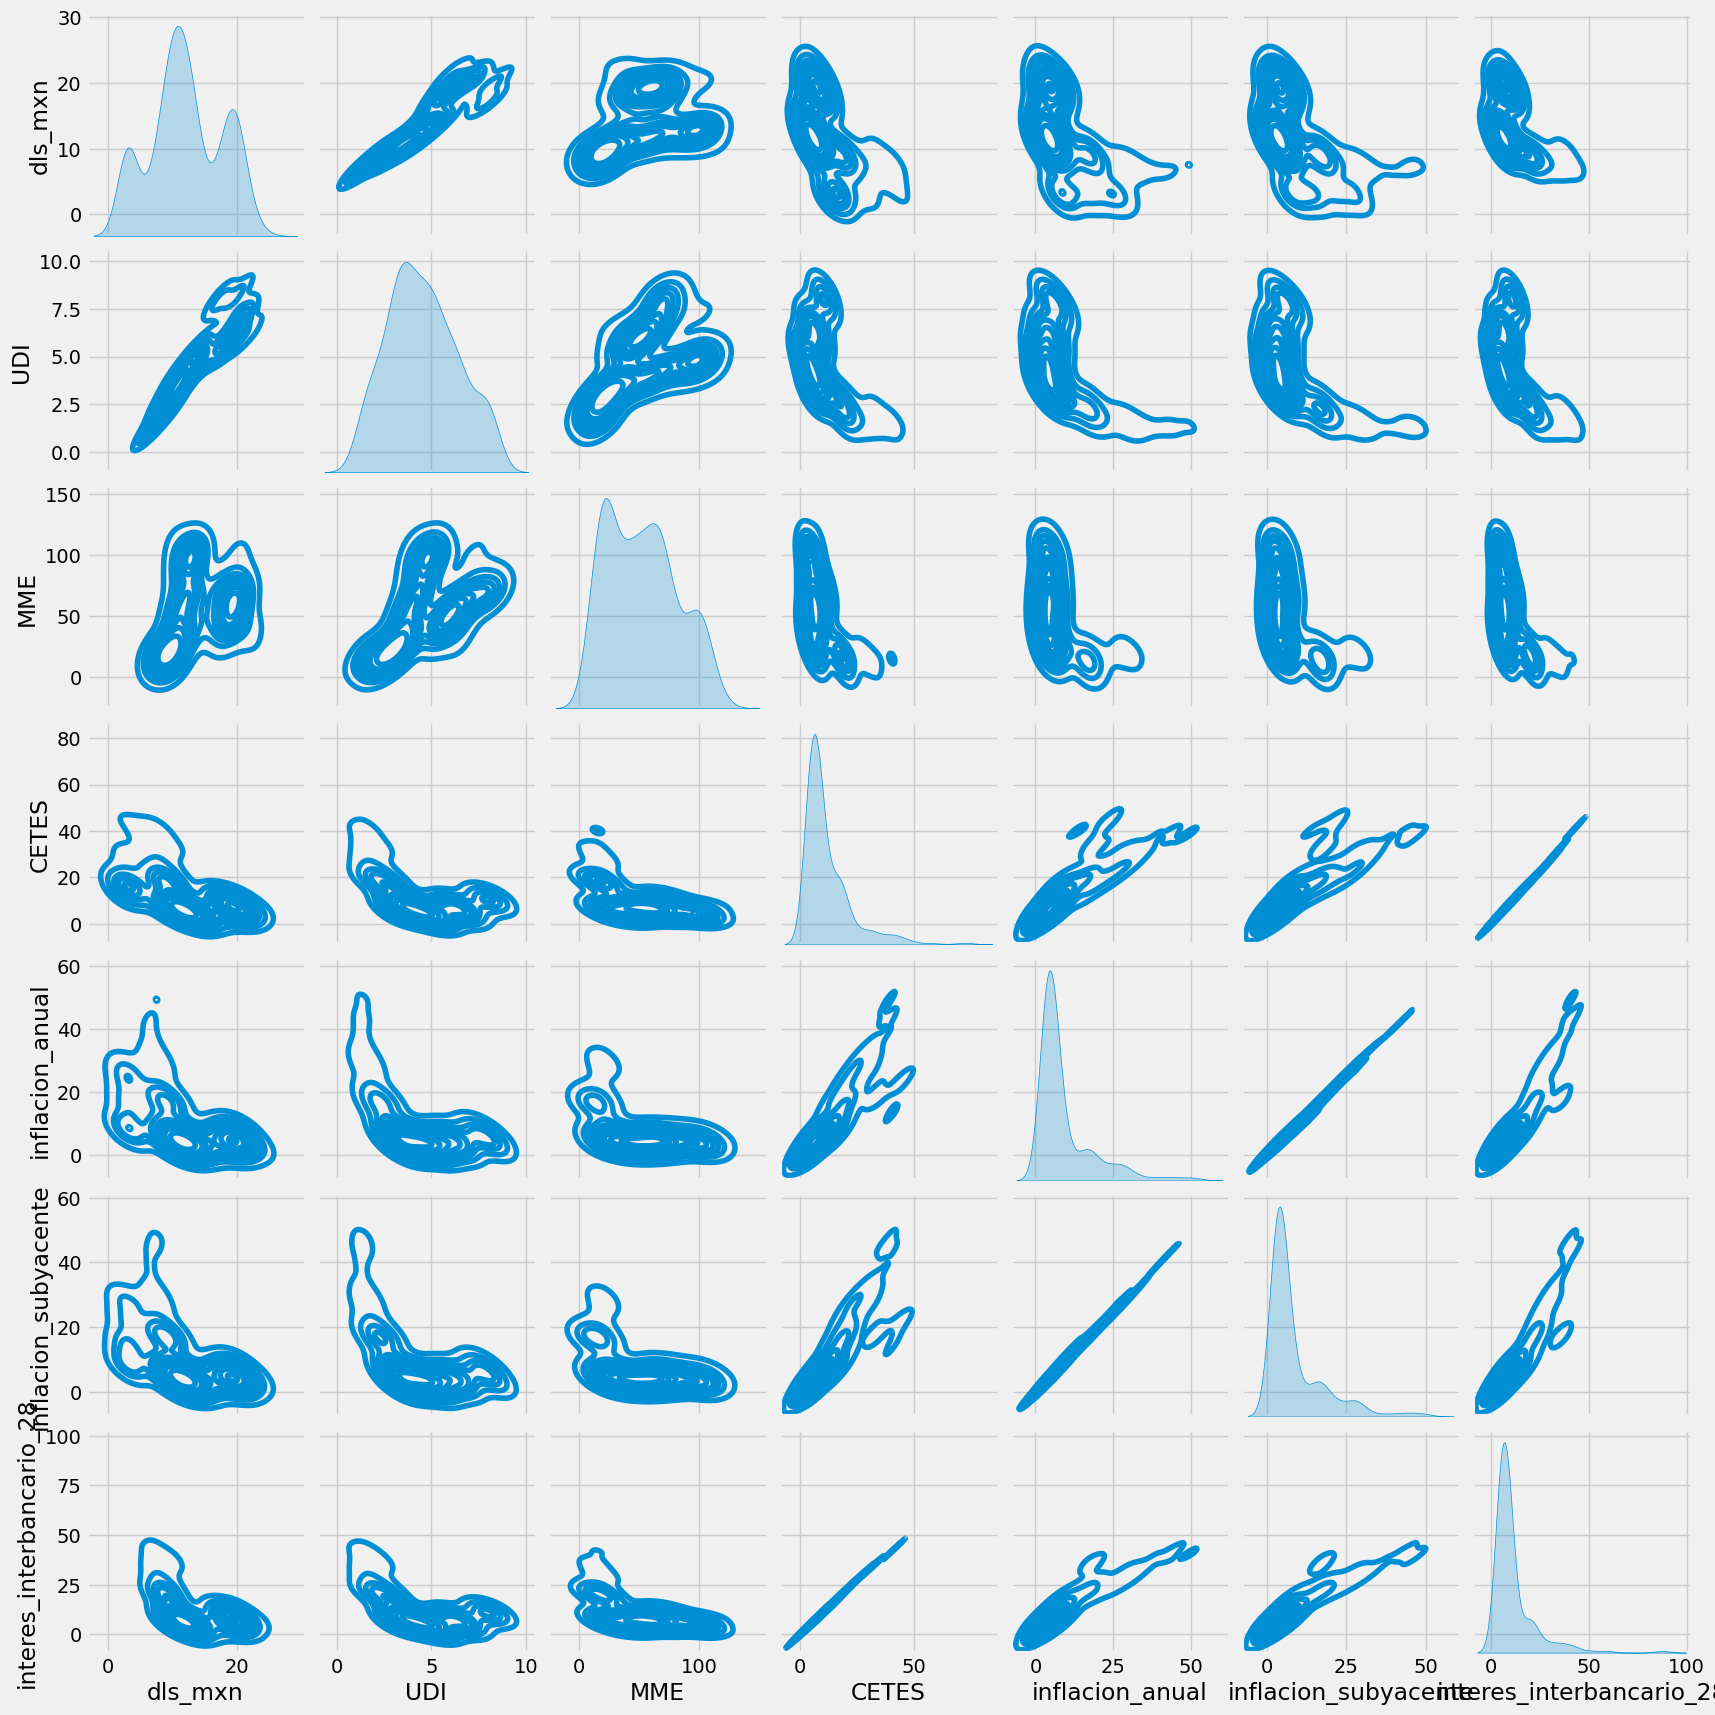

In [65]:
plt.figure(figsize=(10, 10))
sns.pairplot(indicadores_mx, kind='kde')

plt.show()

## Time Series Analysis

[Seasonal Decompose Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

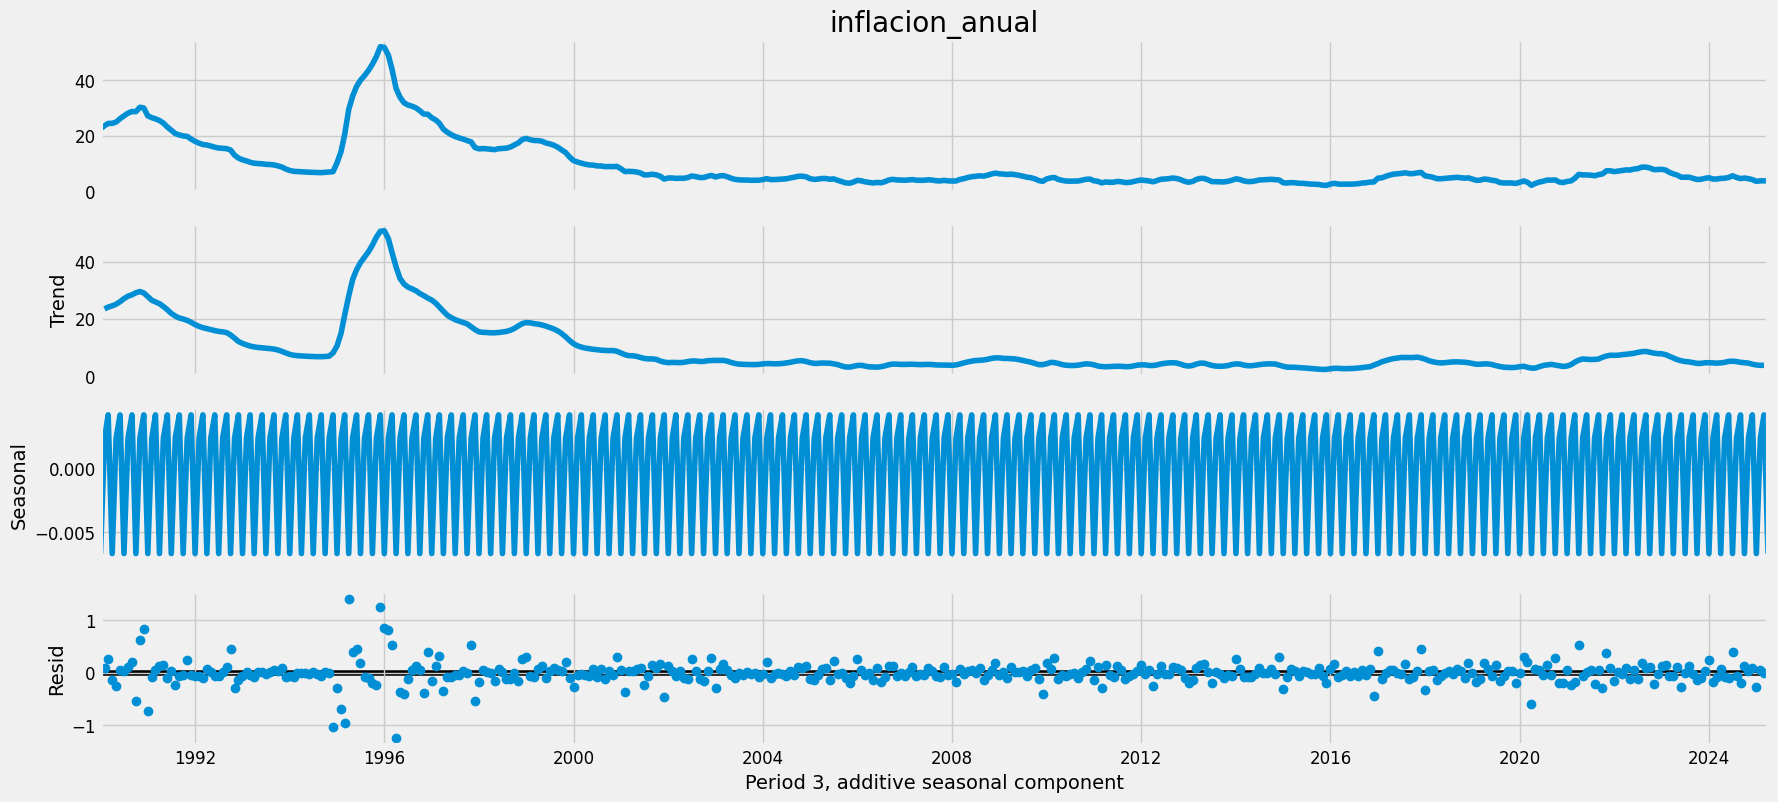

In [72]:
fig = seasonal_decomposition(indicadores_mx.inflacion_anual.ffill(), 3)

plt.xlabel('Period 3, additive seasonal component')

plt.show()

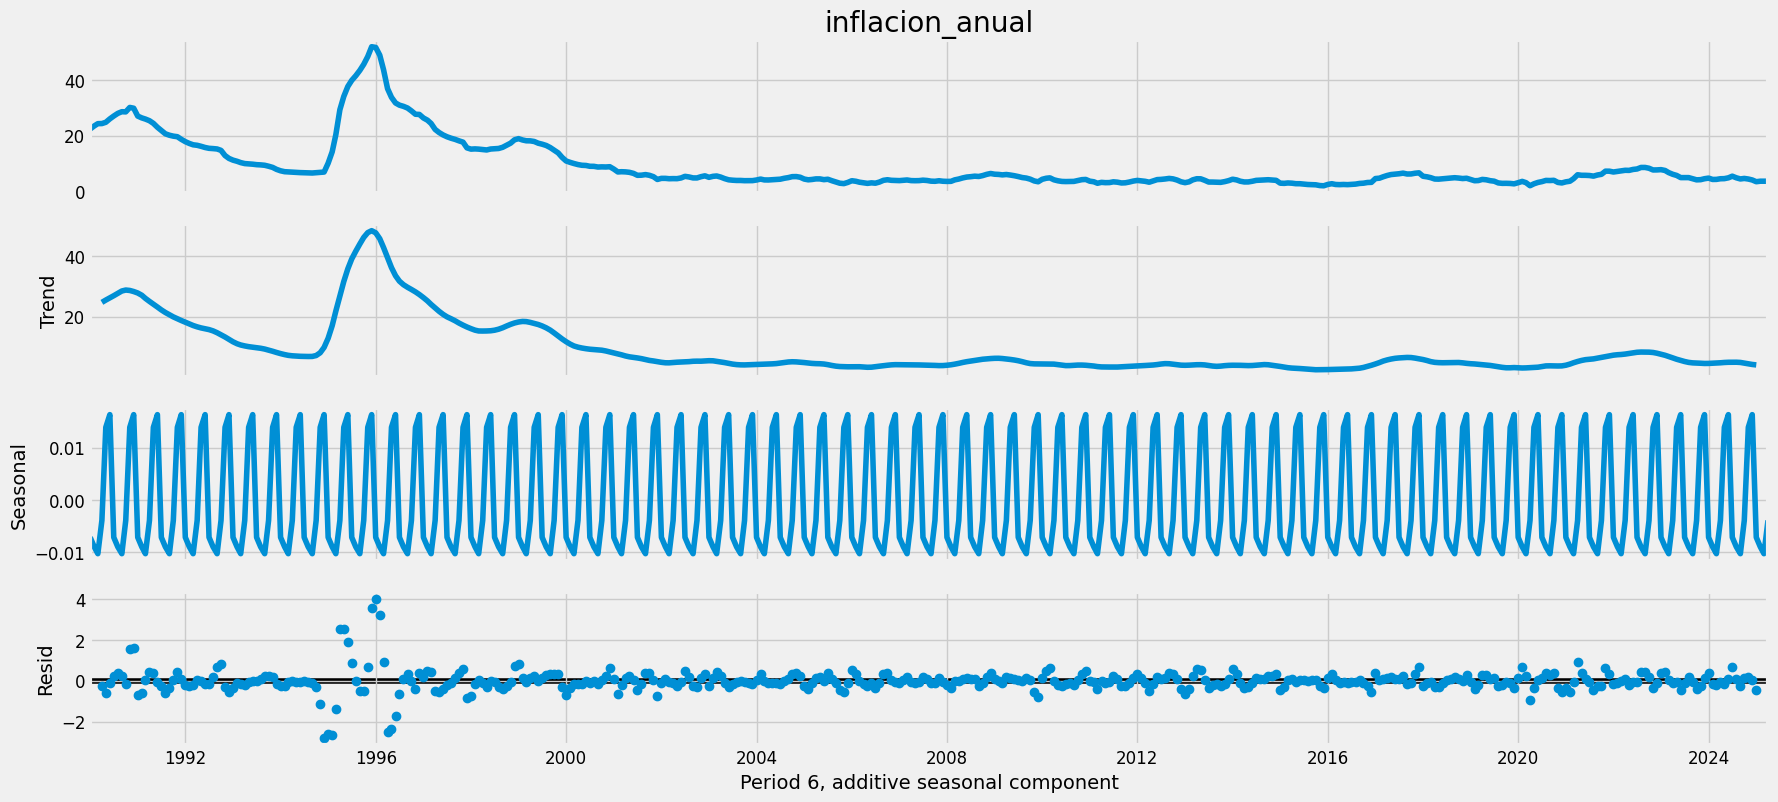

In [73]:
fig = seasonal_decomposition(indicadores_mx.inflacion_anual.ffill(), 6)

plt.xlabel('Period 6, additive seasonal component')

plt.show()

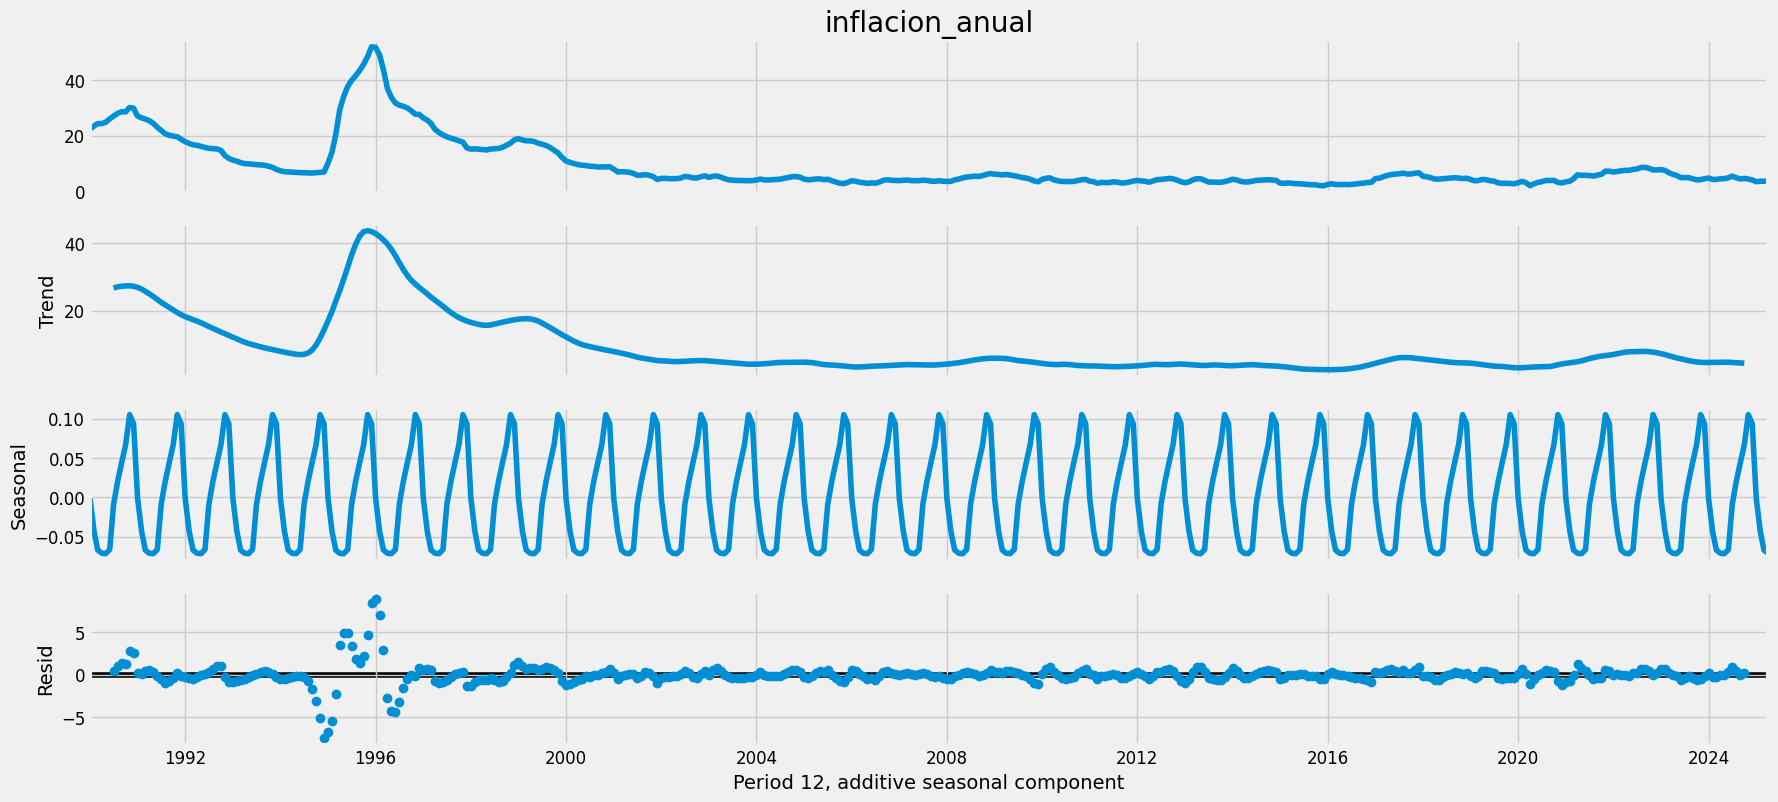

In [74]:
fig = seasonal_decomposition(indicadores_mx.inflacion_anual.ffill(), 12)

plt.xlabel('Period 12, additive seasonal component')

plt.show()

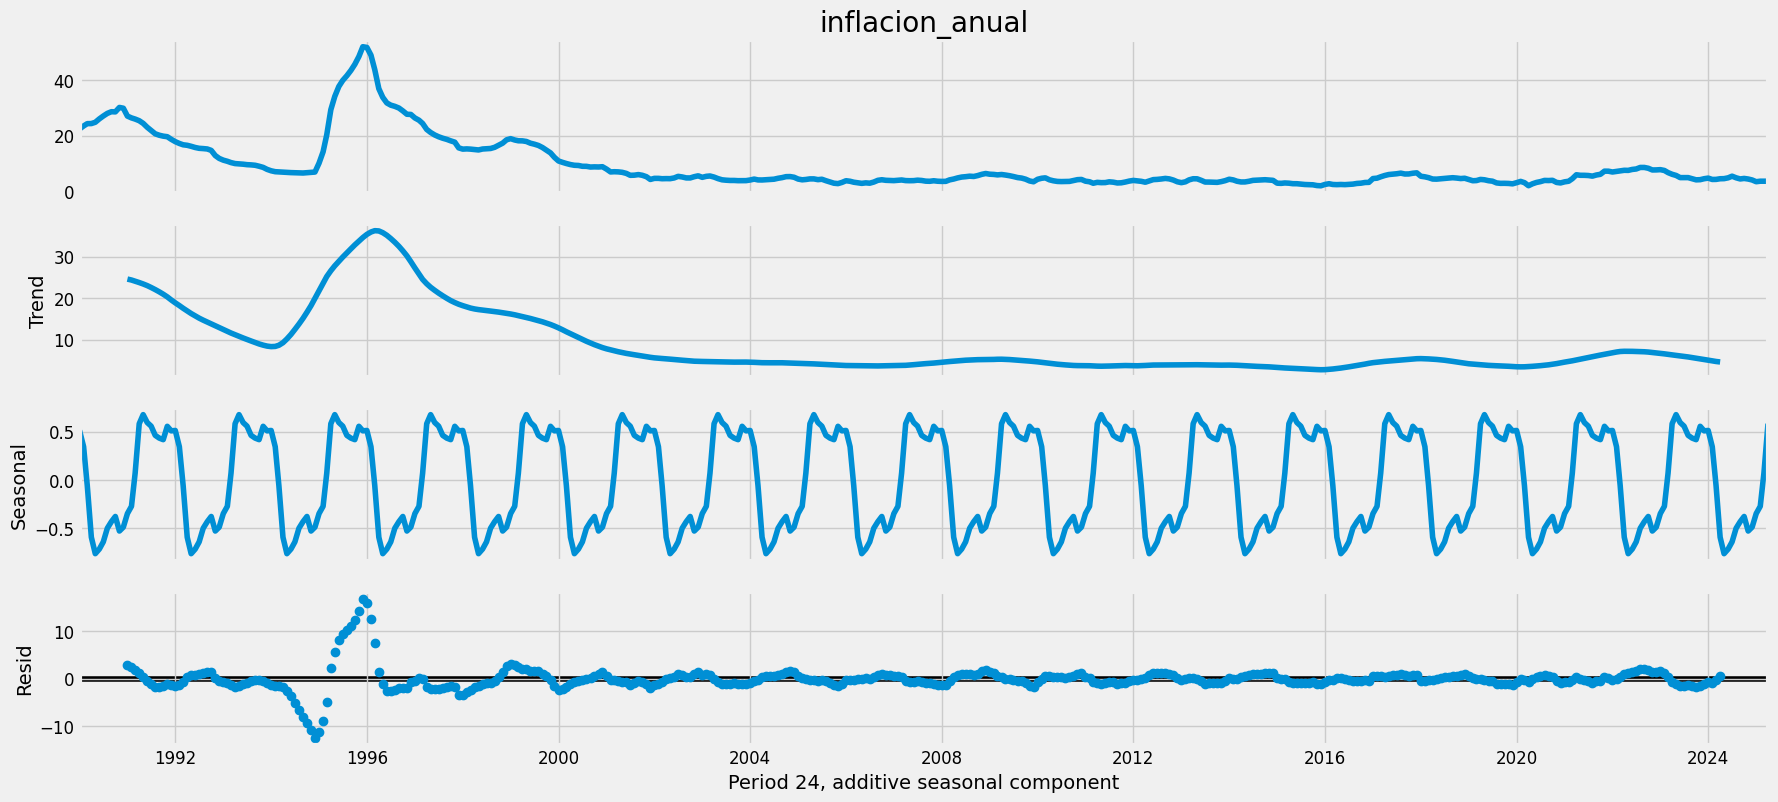

In [75]:
fig = seasonal_decomposition(indicadores_mx.inflacion_anual.ffill(), 24)

plt.xlabel('Period 24, additive seasonal component')

plt.show()

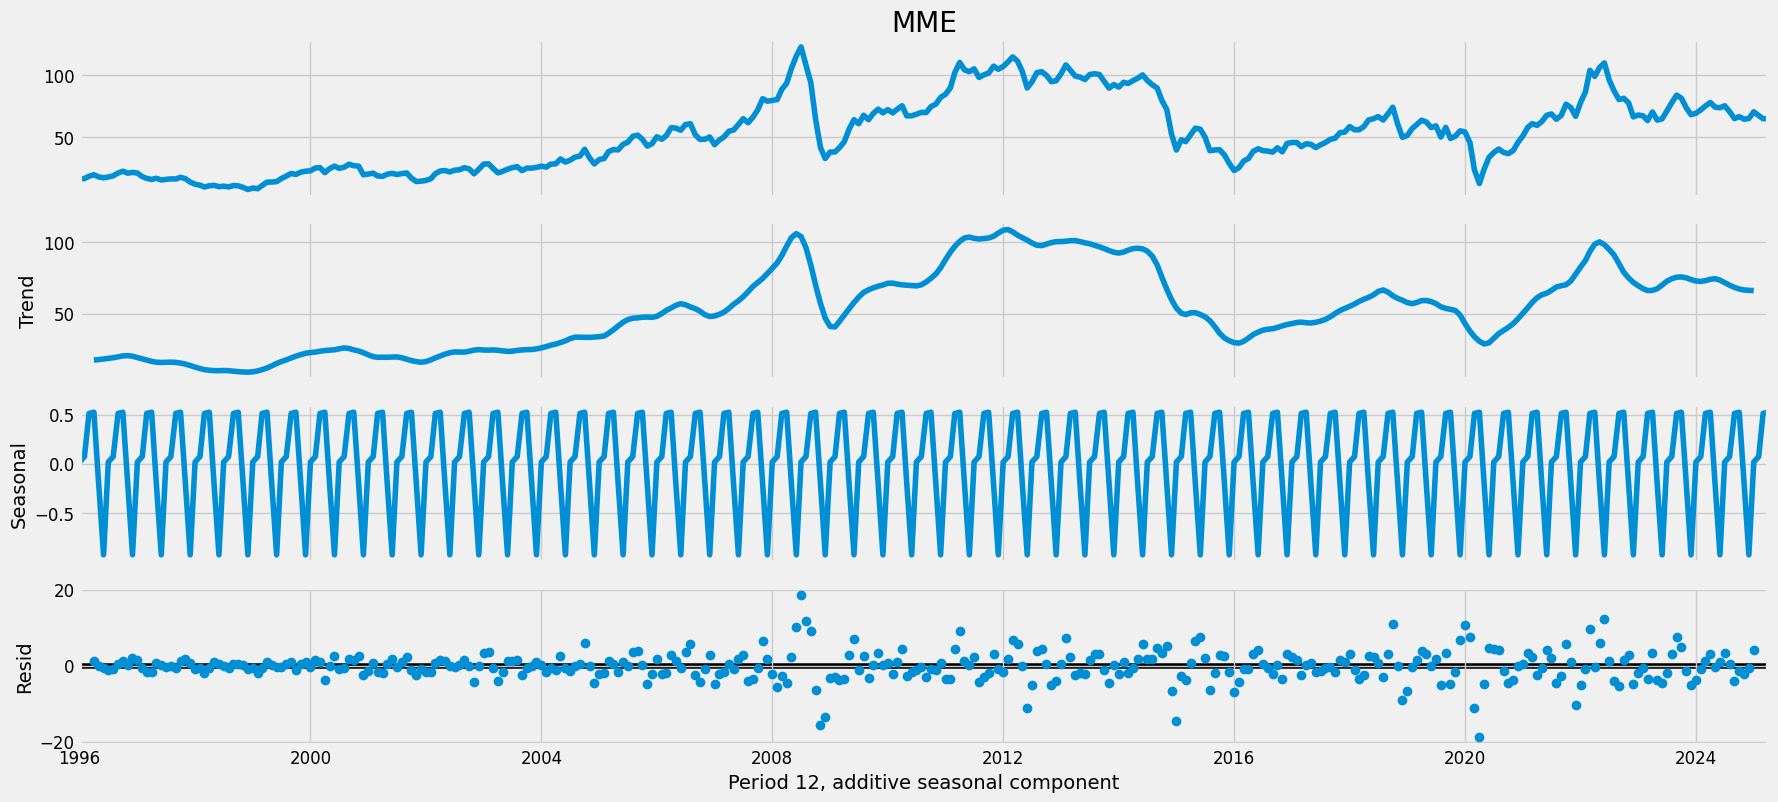

In [70]:
fig = seasonal_decomposition(indicadores_mx['MME'].dropna(), 6)

plt.xlabel('Period 12, additive seasonal component')

plt.show()

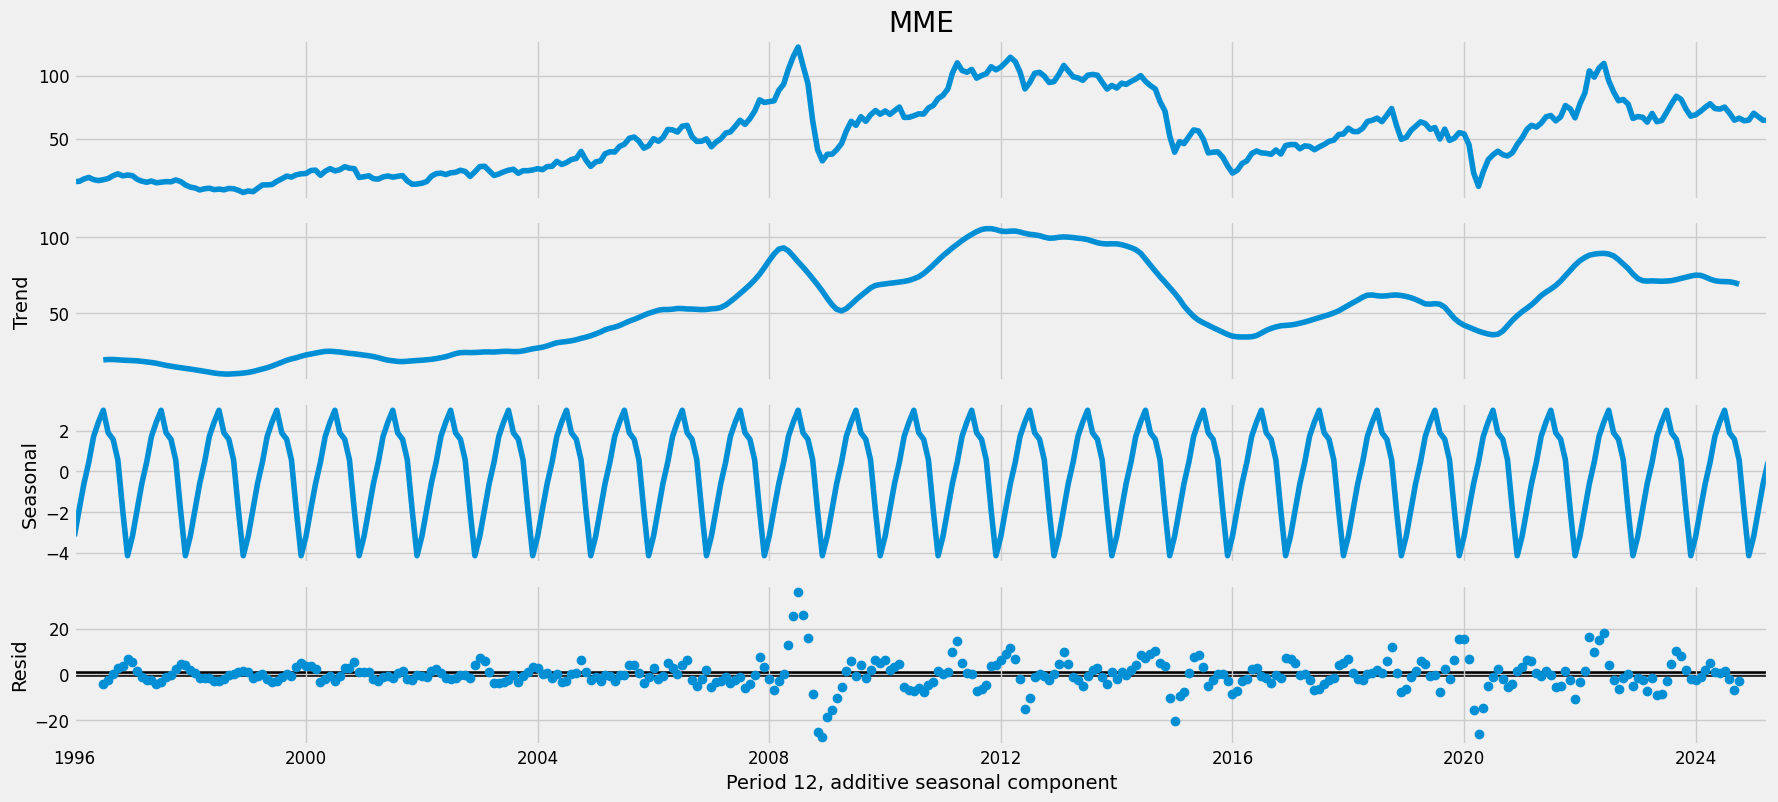

In [71]:
fig = seasonal_decomposition(indicadores_mx['MME'].dropna(), 12)

plt.xlabel('Period 12, additive seasonal component')

plt.show()